<h1><b>Tiền xử lý dữ liệu</b></h1>



***import***

In [51]:
import pandas 
import json 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np
import time
from datetime import datetime
import plotly.express as px

***Hàm xử lý***: xử lý data chuyển dict quote thành list dict riêng

In [52]:
def xuly(id,name,symbol,quotes):
    value={}
    value['id']=id
    value['name']=name
    value['symbol']=symbol
    
    for i in quotes:
        if(i=='quote'):continue
        value[i]=quotes[i]
    tmp= quotes['quote']
    for j in tmp:
        value[j]=tmp[j]
    return value
def xuly_data(listquotes):
    value=[]
    for i in listquotes:
        for j in i[3]:
            value.append(xuly(i[0],i[1],i[2],j))
    return value
        
        

***Hàm get address data***

In [53]:
def get_address_data():
    path_to_year='./data/historical-data'
    list_path_to_year=[path_to_year+'/'+path+'/'+'coin-id-1' for path in os.listdir(path_to_year)]
    Top_ID=json.load(open('data/listings-latest.json','r'))
    Top_10_ID=[Top_ID[i]['id'] for i in range(10) ]
    list_id=[i for i in  os.listdir(path_to_year+'/'+'2021') if i.endswith('.json')==False]
    for i in sorted(list_id,key= lambda x: int(x.split('-')[2])):
        if i.endswith('.json')==False and i!='coin-id-9776' and i!='coin-id-10063' and i!='coin-id-1' and int(i.split('-')[2]) in Top_10_ID:
            list_path_to_year.append(path_to_year+'/2021/'+i)
    list_path=[]
    for i in list_path_to_year:
        for path in os.listdir(i):
            if path.endswith('.json'):
                list_path.append(i+'/'+path)
    return list_path


***Get data***

In [54]:
data_coin_history_by_id=[]
list_path=get_address_data()
for i in list_path:
    data_tmp=json.load(open(i,'r'))
    if(len(data_tmp['quotes'])!=0):
        tmp=[]
        tmp.append(data_tmp['id'])
        tmp.append(data_tmp['name'])
        tmp.append(data_tmp['symbol'])
        tmp.append(data_tmp['quotes'])
        data_coin_history_by_id.append(tmp)


***Hàm xử lý ngày giờ***: hàm chuyển ngày giờ thành giờ hoặc ngày tùy từng thuộc tính của từng cột 

In [55]:
def xuly_ngay_gio_to_gio(object):
    tmp=object.split('T')[1]
    return tmp[0:8]
def xuly_ngay_gio_to_ngay(object):
    tmp=object.split('T')[0]
    return tmp



***Hàm xử lý data fit mô hình***

In [ ]:
#xuly_data(data_coin_history_by_id)
data_=pandas.DataFrame(xuly_data(data_coin_history_by_id))
for i in data_.keys():
    data_=data_[data_[i]!=0]

del data_['timeOpen']
del data_['timeClose']
data_['date']=''
data_["timeHigh"] = data_["timeHigh"].apply(xuly_ngay_gio_to_gio)
data_["timeLow"] = data_["timeLow"].apply(xuly_ngay_gio_to_gio)
data_["date"] = data_["timestamp"].apply(xuly_ngay_gio_to_ngay)
del data_['timestamp']
data_

# Visualizations

In [57]:
data_.shape

(6212, 12)

***Nhận xét***
- Dữ liệu gồm 12 cột và 6212 dòng
- Ý nghĩa từng cột:
    - name : Tên loại coin.
    - symbol: Viết tắt tên coin.
    - timeHigh: Thời điểm giá coin lên cao nhất trong ngày.
    - timeLow: Thời điểm giá coin xuống thấp nhất trong ngày.
    - open: Giá mở cửa.
    - high: Giá cao nhất trong ngày.
    - low: Giá thấp nhất trong ngày.
    - close: Giá đóng cửa.
    - volume: Tổng số lượng coin giao dịch trong ngày.
    - marketCap: Tổng vốn hóa thị trường.
    - date: Ngày

In [58]:
data_.columns

Index(['id', 'name', 'symbol', 'timeHigh', 'timeLow', 'open', 'high', 'low',
       'close', 'volume', 'marketCap', 'date'],
      dtype='object')

In [59]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 243 to 6454
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6212 non-null   int64  
 1   name       6212 non-null   object 
 2   symbol     6212 non-null   object 
 3   timeHigh   6212 non-null   object 
 4   timeLow    6212 non-null   object 
 5   open       6212 non-null   float64
 6   high       6212 non-null   float64
 7   low        6212 non-null   float64
 8   close      6212 non-null   float64
 9   volume     6212 non-null   float64
 10  marketCap  6212 non-null   float64
 11  date       6212 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 630.9+ KB


In [60]:
data_.mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\3735203571.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_.mean()


id           1.047055e+03
open         4.816951e+03
high         4.950746e+03
low          4.670623e+03
close        4.824004e+03
volume       1.488452e+10
marketCap    1.197433e+11
dtype: float64

***Check Nan***
- Dữ liệu đầy đủ

<AxesSubplot:>

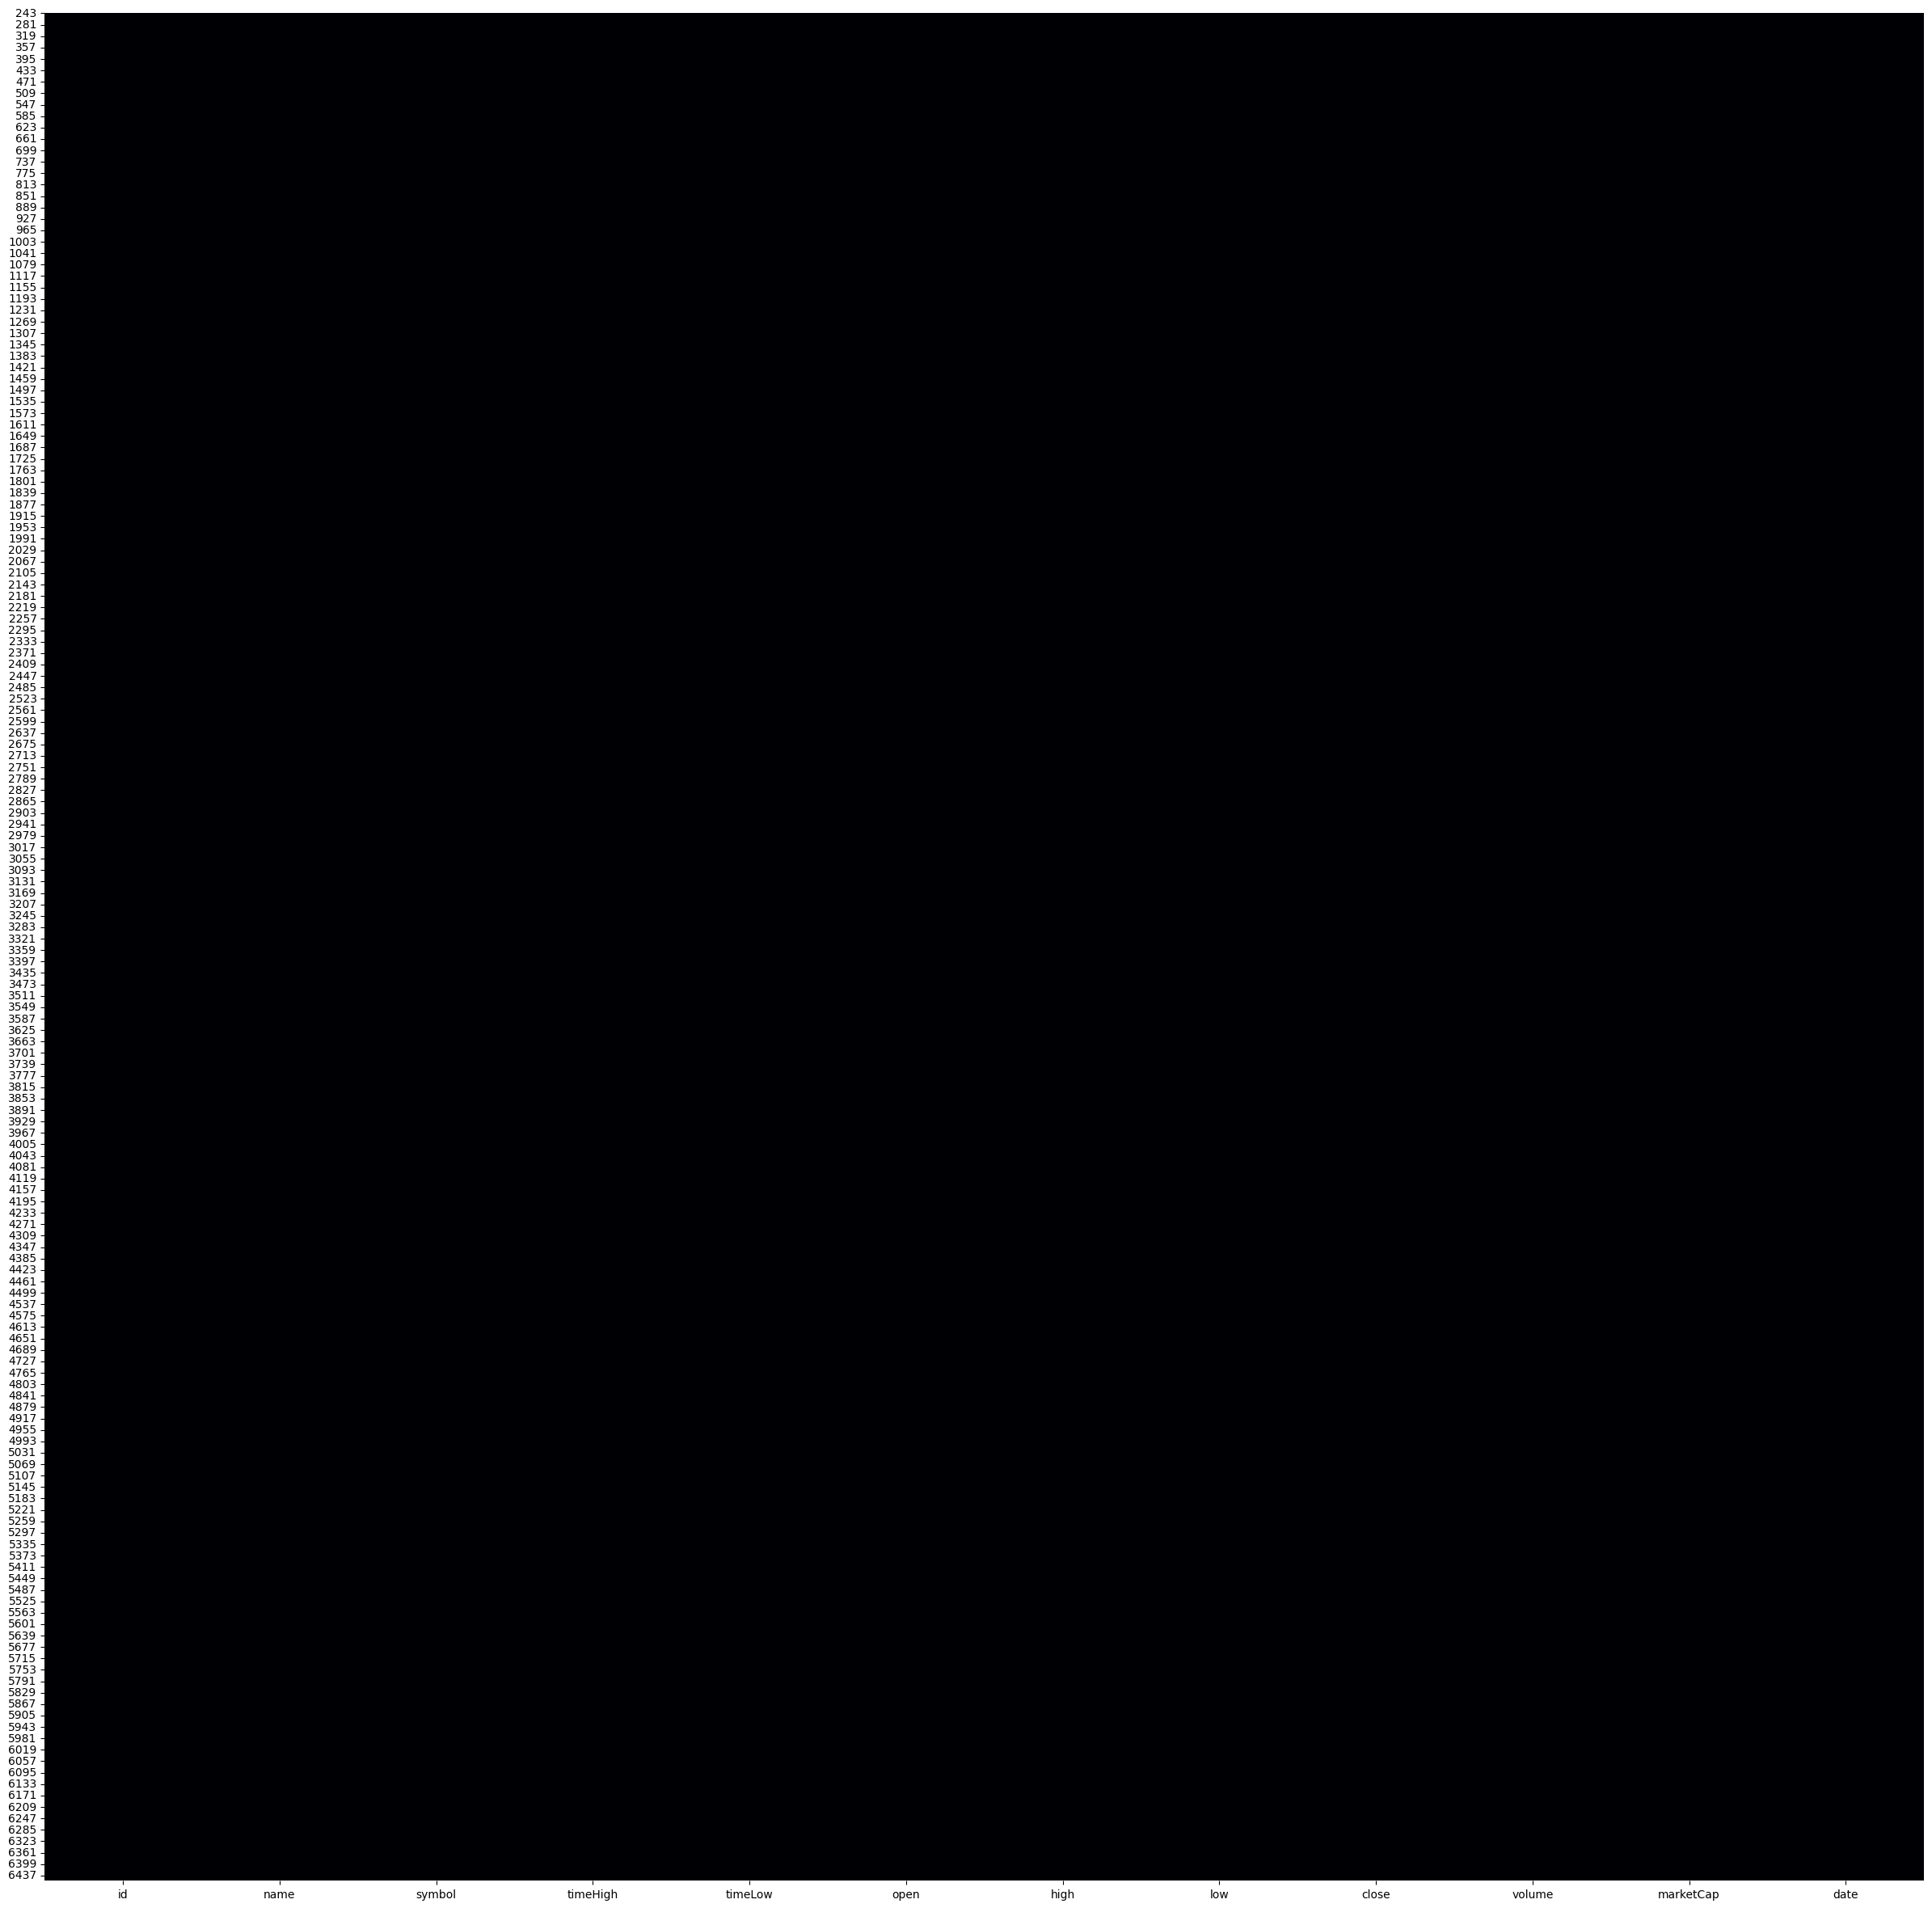

In [61]:
sns.heatmap(data_.isnull(),cmap = 'magma',cbar = False)

# 1.Data visualization
- Sự tương quan giữa 10 loại cryptocurrency khác nhau và điều tra lịch sử biến động giá của các cryptocurrency này
- Các loại cryptocurrency được lấy theo top 10 cmc_rank trong file listings-latest.json bao gồm:
    - bitcoin
    - Ethereum
    - Tether
    - BNB
    - USD Coin
    - Binance USD
    - XRP
    - Dogecoin
    - Cardano
    - Polygon


In [62]:
data_.head(10)

,id,name,symbol,timeHigh,timeLow,open,high,low,close,volume,marketCap,date
243,1,Bitcoin,BTC,00:51:02,19:11:01,763.280029,777.510010,713.599976,735.070007,46862700.0,8.955395e+09,2013-12-27
244,1,Bitcoin,BTC,12:06:01,18:11:01,737.979980,747.059998,705.349976,727.830017,32505800.0,8.869919e+09,2013-12-28
245,1,Bitcoin,BTC,21:46:02,04:41:01,728.049988,748.609985,714.440002,745.049988,19011300.0,9.082104e+09,2013-12-29
246,1,Bitcoin,BTC,20:46:02,00:51:01,741.349976,766.599976,740.239990,756.130005,20707700.0,9.217168e+09,2013-12-30
247,1,Bitcoin,BTC,00:56:02,04:26:02,760.320007,760.580017,738.169983,754.010010,20897300.0,9.191325e+09,2013-12-31
248,1,Bitcoin,BTC,23:46:02,00:01:02,754.969971,775.349976,754.969971,771.400024,22489400.0,9.403308e+09,2014-01-01
249,1,Bitcoin,BTC,21:31:03,15:01:02,773.440002,820.309998,767.210022,802.390015,38489500.0,9.781074e+09,2014-01-02
250,1,Bitcoin,BTC,13:41:02,03:16:01,802.849976,834.150024,789.119995,818.719971,37810100.0,9.980135e+09,2014-01-03
251,1,Bitcoin,BTC,23:56:02,04:21:01,823.270020,859.510010,801.669983,859.510010,38005000.0,1.047736e+10,2014-01-04
252,1,Bitcoin,BTC,19:26:01,02:06:01,858.549988,952.400024,854.520020,933.530029,72898496.0,1.137966e+10,2014-01-05


## 1.1 Volume Distribution Plot
- Biểu đồ phân bổ khối lượng giao dịch theo từng loại cryptocurrency theo tỷ lệ %.
- Câu hỏi: Lượng giao dịch của loại cryptocurrency nào là nhiều nhất, loại nào là ít nhất và sự tương quan giữa chúng.
- Trả lời: Biểu đồ cho ta thấy khối lượng giao dịch của Tether là nhiều nhất, Polygon là ít nhất, còn những loại khác thì xấp xỉ nhau.
- Giải thích: 
    - Tether(USDT) là loại tiền mã hóa theo giá tiền pháp định đầu tiên của thế giới vì vậy cho nên loại tiền này được làm đơn vị để quy đổi ra loại tiền khác. Mức độ ổn định giá tương đối cao, neo và cố định giá theo đồng USD tỷ lệ 1:1 vì vậy Tether thường được làm đơn vị tiền trung gian. 
    - Bitcoin, Ethereum, XRP là những cryptocurrency có vị trí có vị thế lớn trong thị trường tiền ảo, nhiều công dụng, giá cả tăng ổn định, được nhà phát triển quan tâm nên tương lai có thể sẽ có nhiều tiềm năng phát triển mở rộng hơn nên được ưa chuộng đầu tư.
    - Polygon là một giao thức và một khuôn khổ để xây dựng và kết nối các mạng blockchain tương thích với Ethereum. Ethereum có thể mở rộng quy mô tương đối nhanh hơn, các ứng dụng phi tập trung hiện tại và sắp ra mắt sẽ tin tưởng Ethereum 2.0 hơn. Nên về lâu dài Ethereum sẽ cắt giảm số lượng người dùng trên Polygon. Do đó Polygon là loại cryptocurrency đáng đầu tư nhưng có rủi ro cao, dễ bị khai tử.
    

BNB:1.7720493816005145
Binance USD:3.3987963371342973
Bitcoin:8.183720217557598
Cardano:2.620337543278887
Dogecoin:2.574717214679395
Ethereum:16.955369654703773
Polygon:0.7645662909904858
Tether:58.19163416690019
USD Coin:1.7558865510989075
XRP:3.7829226420559747


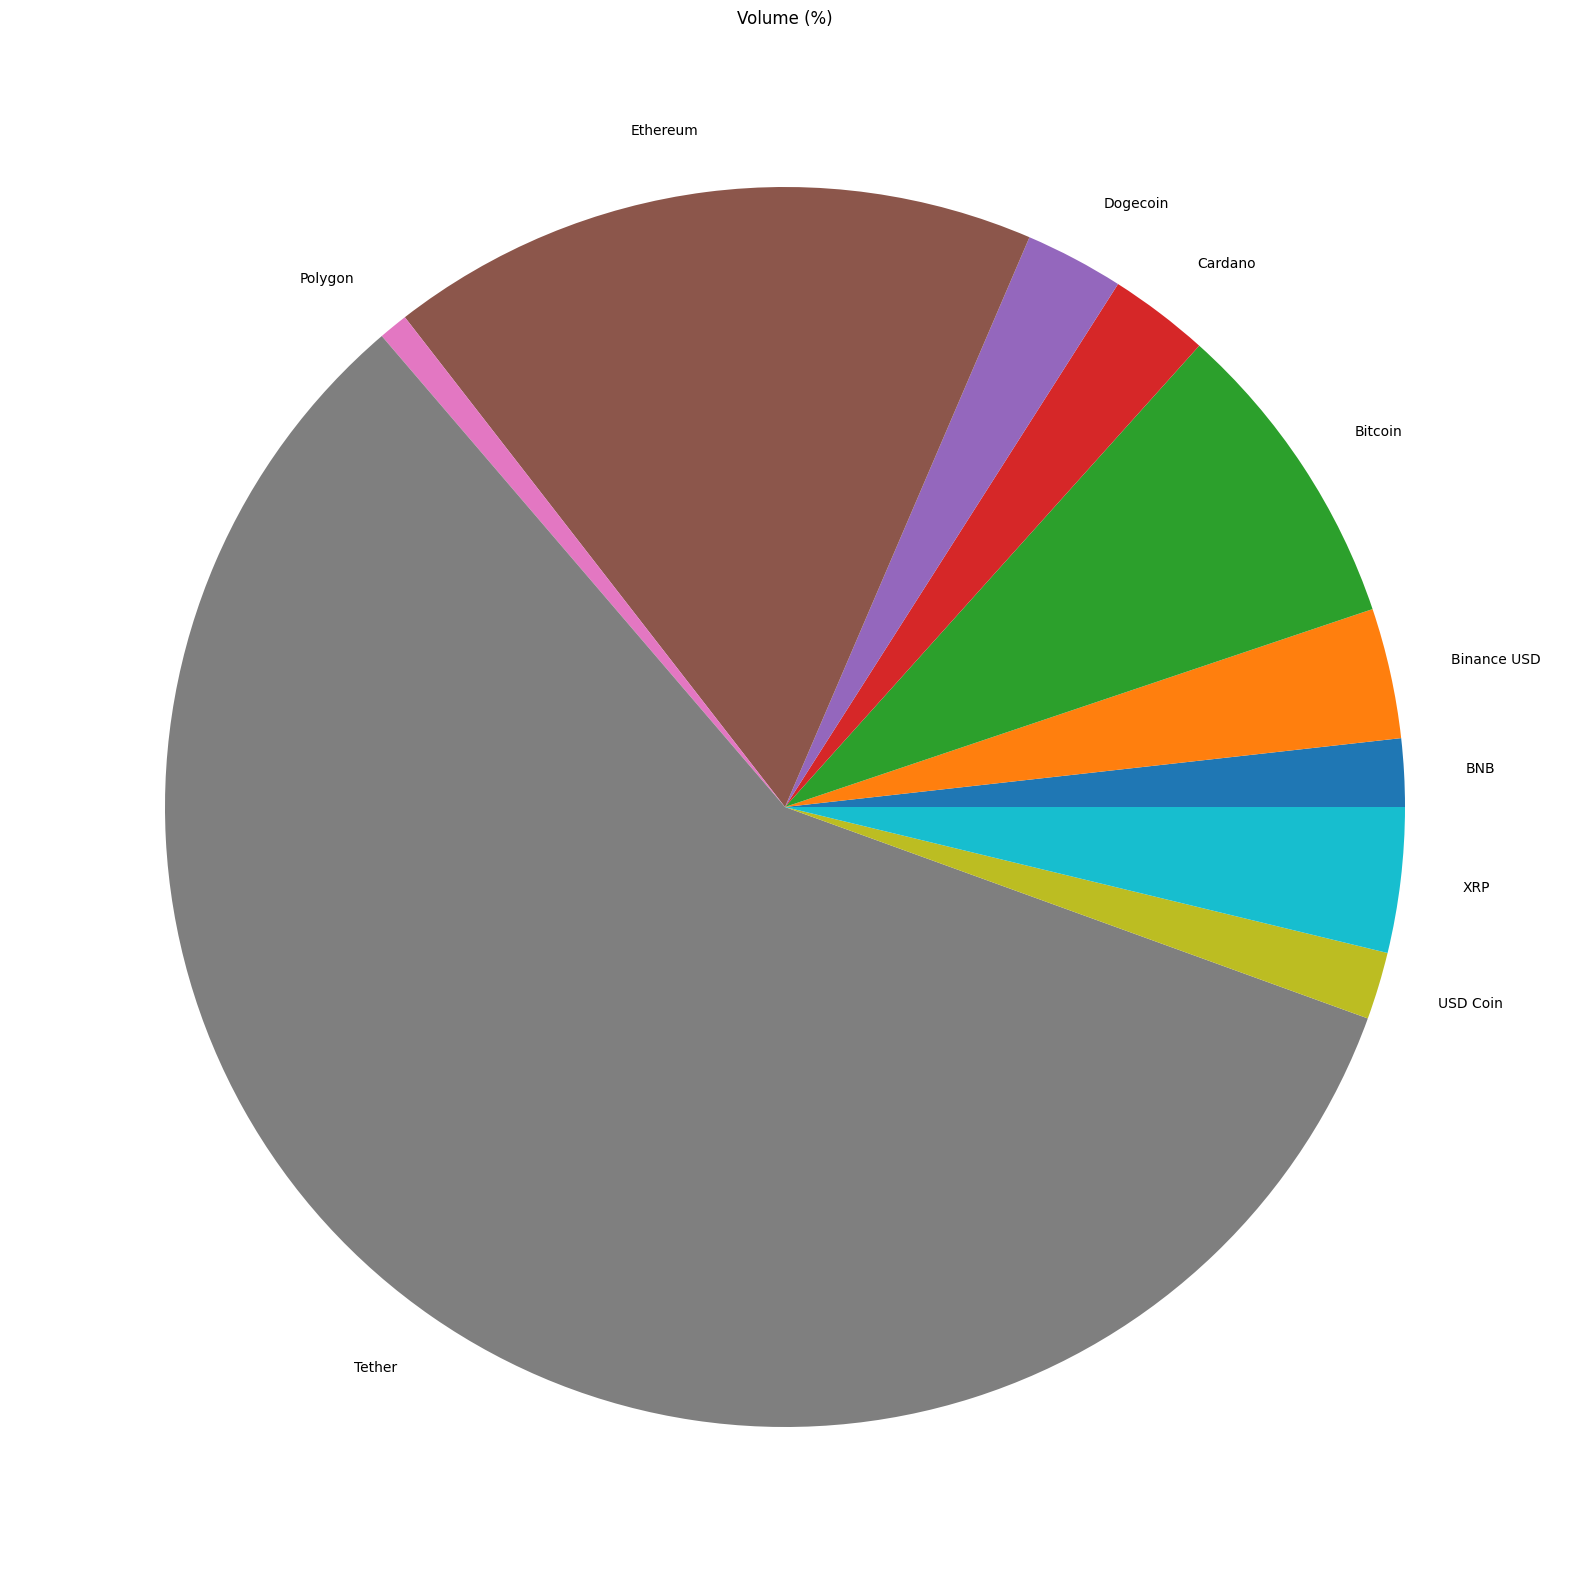

In [63]:
def draw_volume_avg(data_):   
    list_volume_avg=[]
    list_name=sorted(Counter(data_['name']))
    for i in list_name:
        data_temp=list(data_[data_['name']==i]['volume'].values)
        list_volume_avg.append(sum(data_temp)/len(data_temp))
    list_volume_avg_percent=[]
    for i in list_volume_avg : 
        list_volume_avg_percent.append(i/sum(list_volume_avg))
    for i in range(0,len(list_volume_avg_percent)):
        print(list_name[i]+ ":"+str(list_volume_avg_percent[i]*100))
    plt.rcParams["figure.figsize"] = (20,30)
    plt.pie(list_volume_avg_percent,labels=list_name)
    plt.title('Volume (%)')
    plt.show()
draw_volume_avg(data_)

## 1.2 Cryptocurrency Correlation Plot:
- Thể hiện xử tương quang giữa giá của 2 cryptocurrency với nhau từ đó thấy được sự tương quang của giá của chúng khi 1 crypto trong cặp tăng lên hoặc giảm xuống thông qua return_log
- Câu hỏi : Các cặp cryptocurrency nào có ảnh hưởng mật thiết với nhau?  

In [64]:
def select_month(object):
    return object[5:7]
def select_year(object):
    return object[0:4]
def test(object):
   return time.mktime(datetime.strptime(object, "%Y-%m-%d").timetuple())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\1146820572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_year['year']=data_by_year['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\1146820572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['totimestamp']=data_test['date'].apply(test)


['Bitcoin', 'XRP', 'Dogecoin', 'Tether', 'Ethereum', 'BNB', 'Cardano', 'USD Coin', 'Polygon', 'Binance USD']
{'Bitcoin': 1, 'XRP': 52, 'Dogecoin': 74, 'Tether': 825, 'Ethereum': 1027, 'BNB': 1839, 'Cardano': 2010, 'USD Coin': 3408, 'Polygon': 3890, 'Binance USD': 4687}


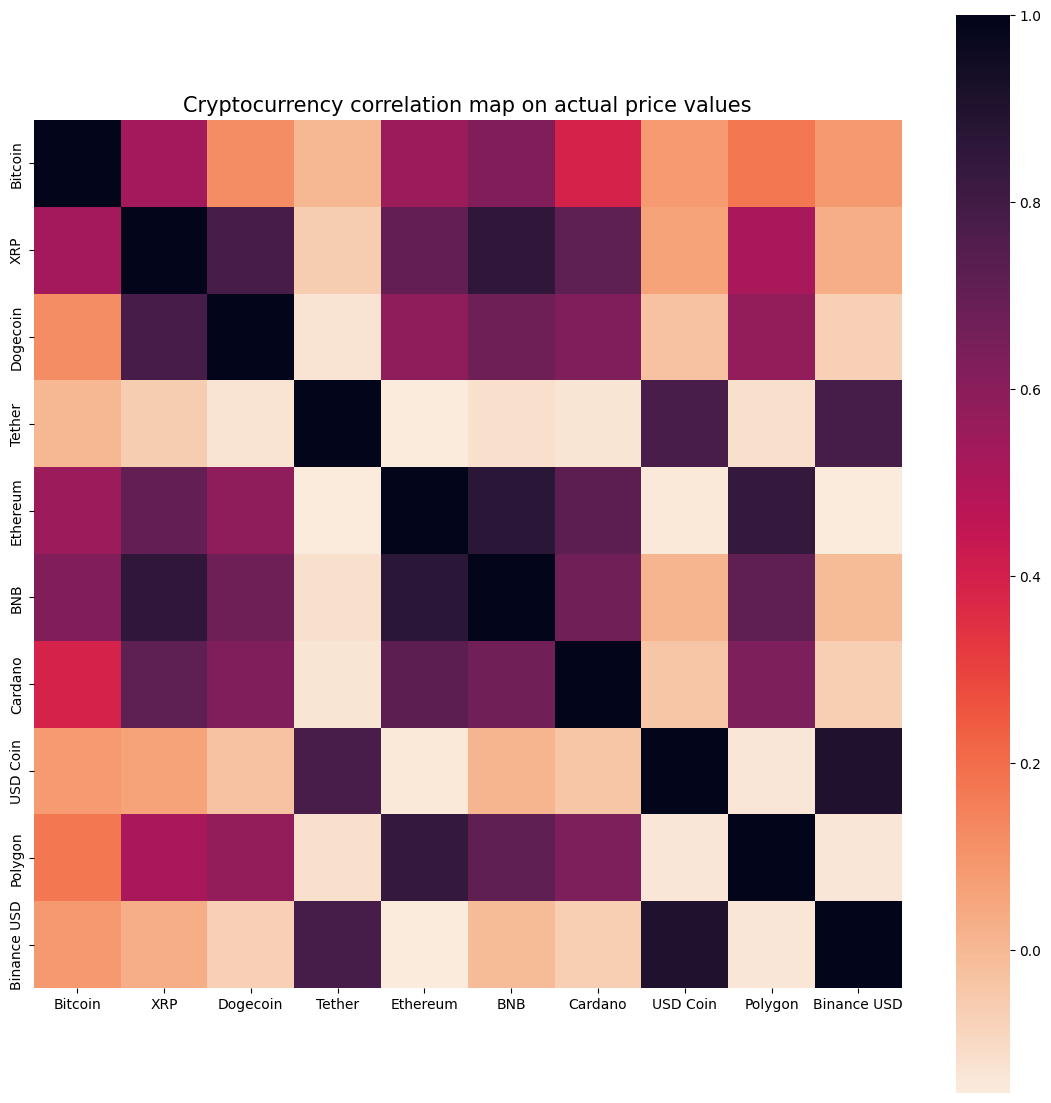

In [65]:
def test(object):
    return time.mktime(datetime.strptime(object, "%Y-%m-%d").timetuple())
data_by_year = data_[['name','id','close','date']]
data_by_year['year']=data_by_year['date'].apply(select_year)
data_test=data_by_year[data_by_year['year']==str(2021)]
data_test['totimestamp']=data_test['date'].apply(test)
data_name=list(Counter(data_test['name']))
print(data_name)
asset_names_dict = {row["name"]:row["id"] for ind, row in data_test.iterrows()}
print(asset_names_dict)
totimestamp= lambda s: np.int32(time.mktime(datetime.strptime(s,"%Y-%m-%d").timetuple()))
all_assets_df = pandas.DataFrame([])
for ind, coin in enumerate(data_name):
    if(coin=="BTC"):continue
    coin_df = data_test[data_test["id"]==asset_names_dict[coin]].set_index("totimestamp")
    close_values = coin_df["close"].fillna(0)
    close_values.name = coin
    all_assets_df = all_assets_df.join(close_values, how="outer")

corrmat = all_assets_df.corr()
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax=1., square=True, cmap="rocket_r")
plt.title("Cryptocurrency correlation map on actual price values", fontsize=15)
plt.show()

***Trả lời*** : 
- Quả biểu đồ ta nhận thấy rằng các cặp (USD coin, Binance USD),(polygon,Ethereum),... 
- Ta cũng nhận thấy rằng Bitcoin có quan hệ mật thiết với tất cả loại cryto khác.Trong khi đó DogeCoin và Tether khá độc lập(Như đã đề cập Tether là đồng tiền định giá ổn định nên giá trị không thay đổi nhiều so với loại cryto khác dẫn đến việc xét ảnh hưởng ở đồ thị ).
***Lợi ích***: 
- Dự đoán được các cặp cryto tăng giá chung với nhau từ đó có hướng đầu tư thích hơp.

# 2. Historical Coin (Exploratory Data Analysis)
- Trực quan sự biến động giá của 10 loại cryptocurrency.

## 2.1 Historical price in 2021
- Nhận xét: 
    - Binance USD, USD Coin, Tether: Không biến động nhiều. 
    - BNB: là một trong số các cryptocurrency đạt mức giá cao nhất vào tháng tư, năm 2021 (630 USD). Và vẫn duy trì mức giá cao này đến hết năm 2021.
        -  Giải thích: có ba yếu tố ảnh hưởng đến giá BNB: cung cầu, sự thành công của ICO, IDO, tổng nguồn cung của Binance coin.
    - Bitcoin: liên tục vượt đỉnh trong 2 tháng đầu năm 2021, tốc độ tăng trưởng cao kỷ lục.
        - Giải thích: Đại dịch Covid-19 đã gây ra nguy cơ lạm phát, một số ngân hàng trung ương đang có kế hoạch phát triển tiền kỹ thuật số thay cho tiền mặt dẫn đến Bitcoin tăng giá chóng mặt.
    - Các loại cryptocurrency khác: Biến động giá liên tục, giai đoạn tháng 1- tháng 5 tăng , sau đó giảm đến đến tháng 9 thì bắt đầu tăng trở lại.

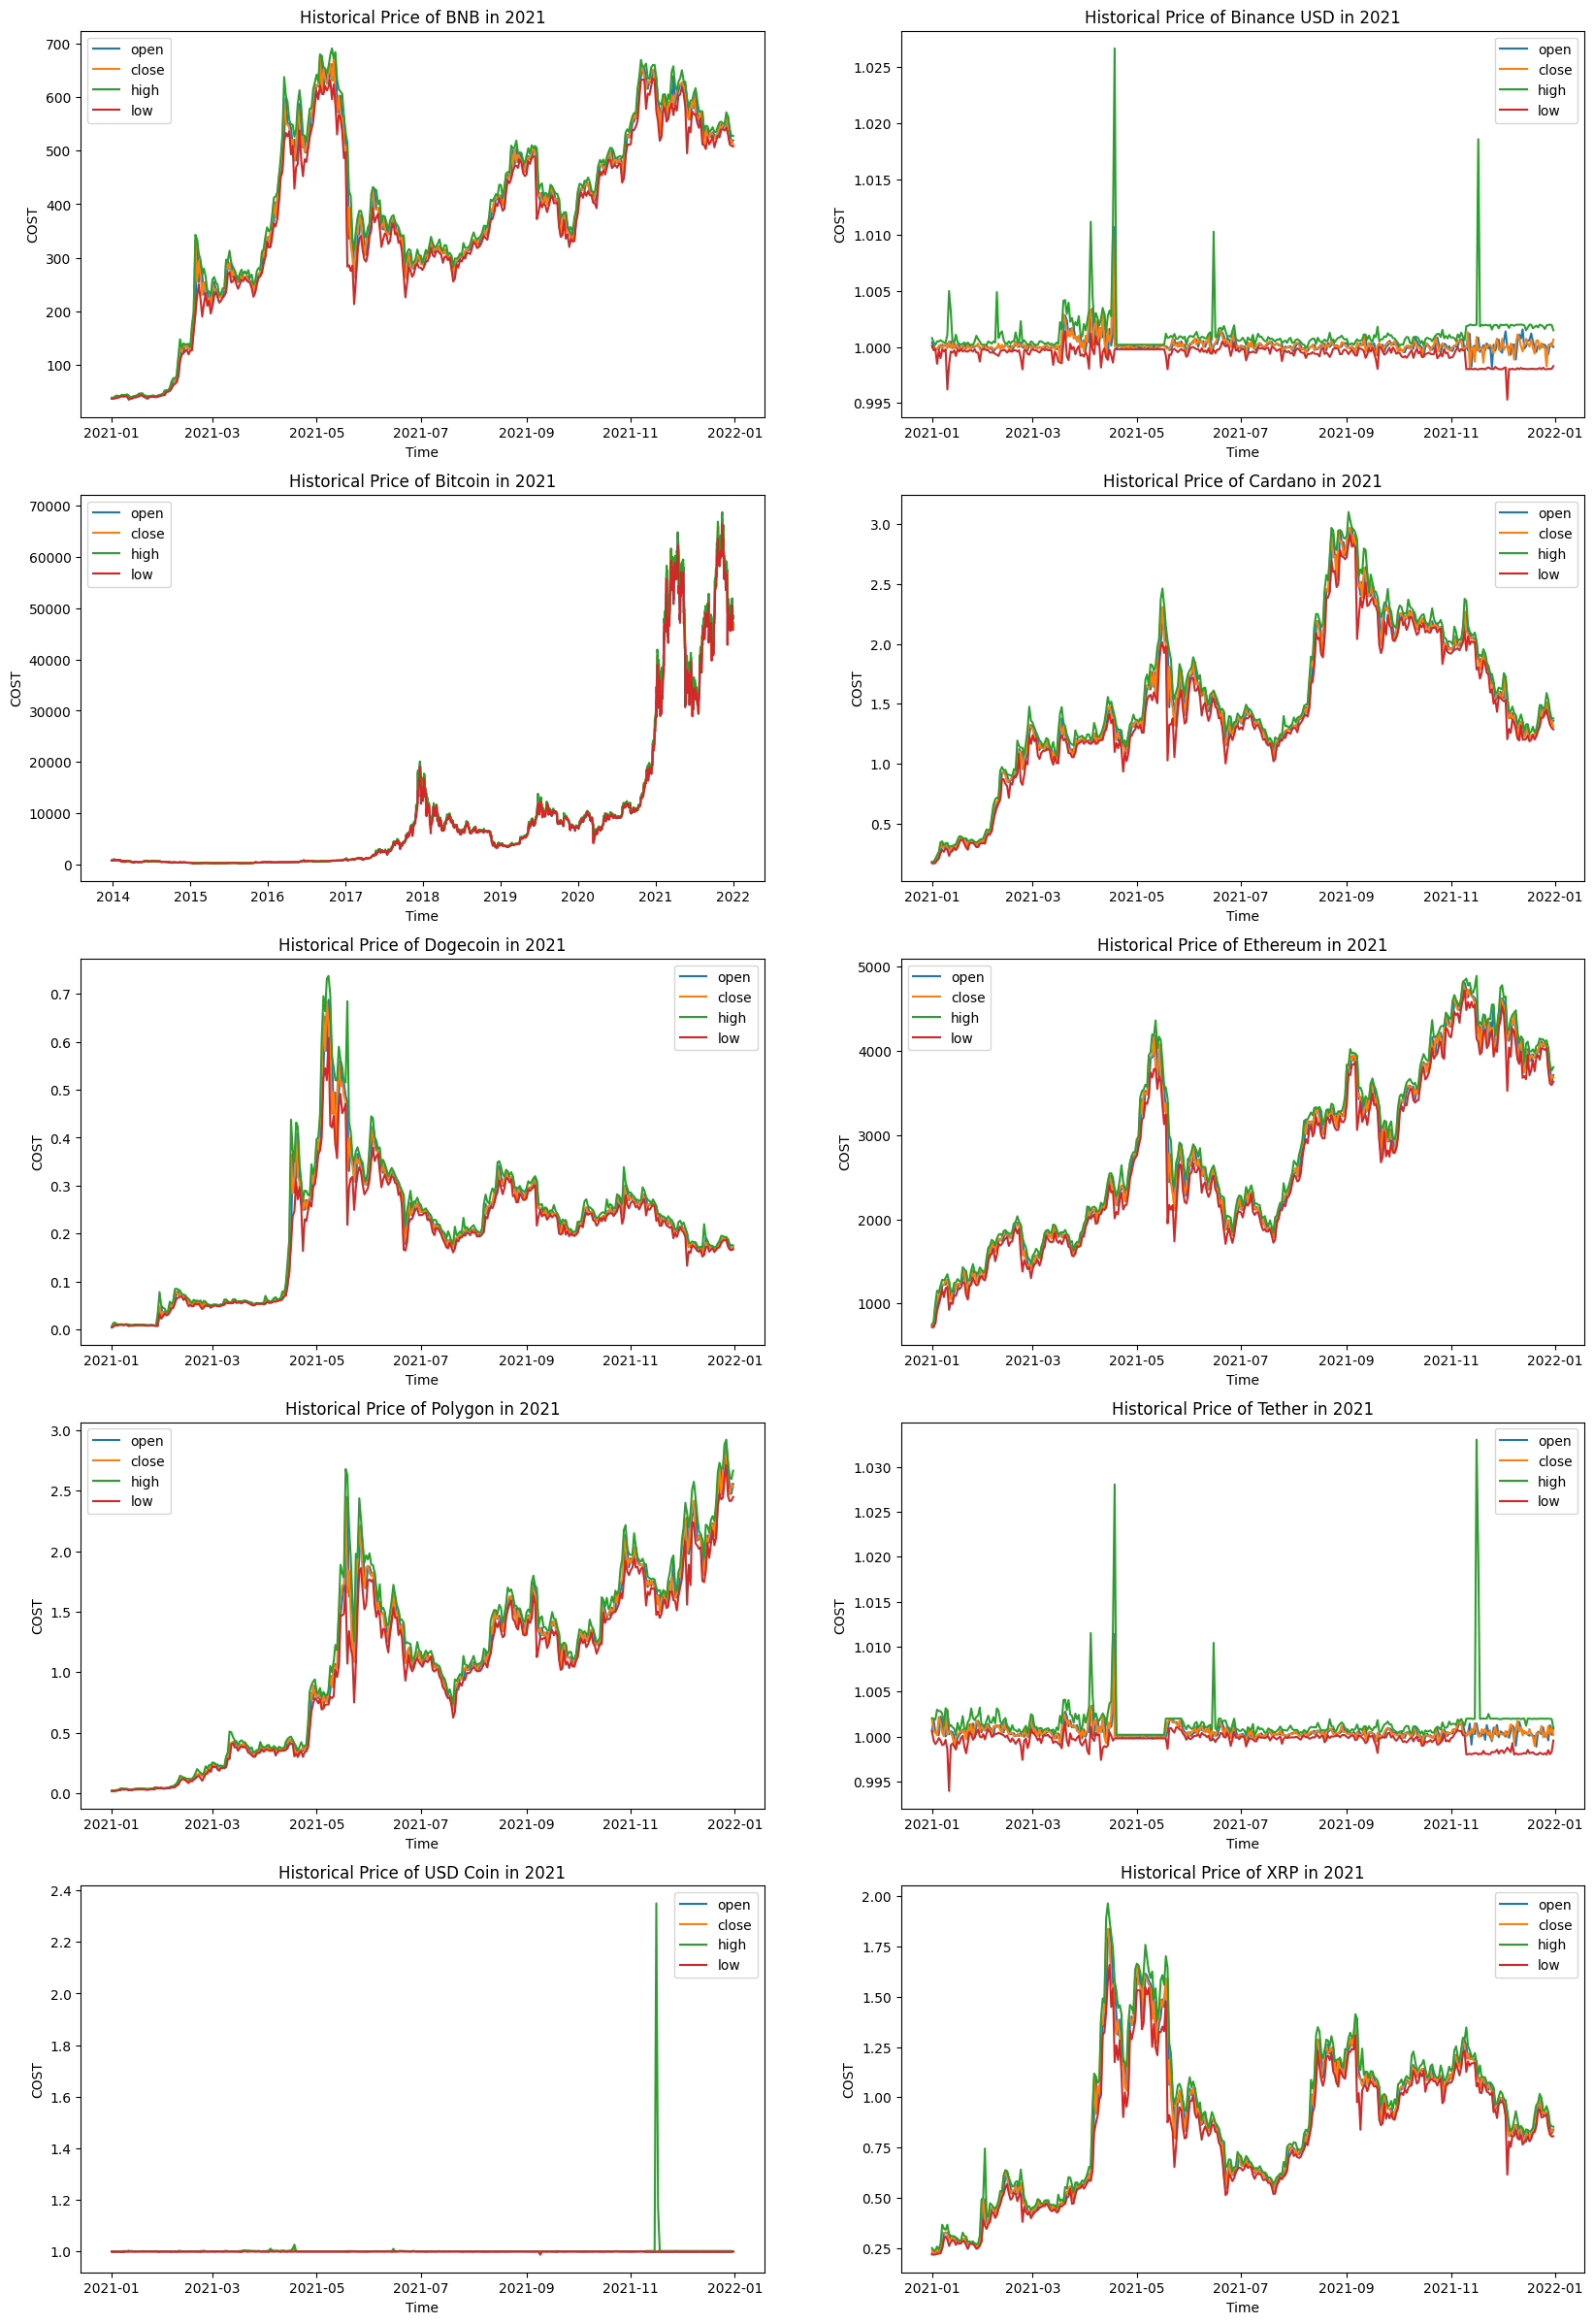

In [66]:

def BienDongGia():
    plt.rcParams["figure.figsize"] = (20,30)
    dem=1
    for i in sorted(Counter(data_['name'])):
        data_cryto=data_[data_['name']==i]
        plt.subplot(5,2,dem)
        plt.plot(pandas.to_datetime(data_cryto['date'], format="%Y-%m-%d").values,data_cryto['open'],label='open')
        plt.plot(pandas.to_datetime(data_cryto['date'], format="%Y-%m-%d").values,data_cryto['close'],label='close')
        plt.plot(pandas.to_datetime(data_cryto['date'], format="%Y-%m-%d").values,data_cryto['high'],label='high')
        plt.plot(pandas.to_datetime(data_cryto['date'], format="%Y-%m-%d").values,data_cryto['low'],label='low')
        plt.xlabel("Time")
        plt.ylabel("COST")
        plt.title("Historical Price of "+i+" in 2021" )
        dem+=1
        plt.legend()
    plt.show()
BienDongGia()

## 2.2 Candlestick chart
- Biểu đồ thể hiện xự tương quan về giá trị của các biến ['open','high','close','low'] nó ảnh hưởng đến việc hình thành các mức giá cuối sàn của một sàn giao dịch cryto

- Biểu đồ nến giúp nhà đầu tư biết xu hướng tăng giảm của thị trường, từ đó có những quyết định mua bán hợp lý.
- Câu hỏi: Nên đầu tư và rút vốn vào thời điểm nào ?
- Trả lời: Ví dụ cho loại Bitcoin nên đầu tư khi thị trường đã uptrend và đã hình thành đáy, còn khi giá trị đồng tiền tăng cao đột ngột thì nên bán.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\1831597359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['year']=data_['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\1831597359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['year']=data_['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\1831597359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

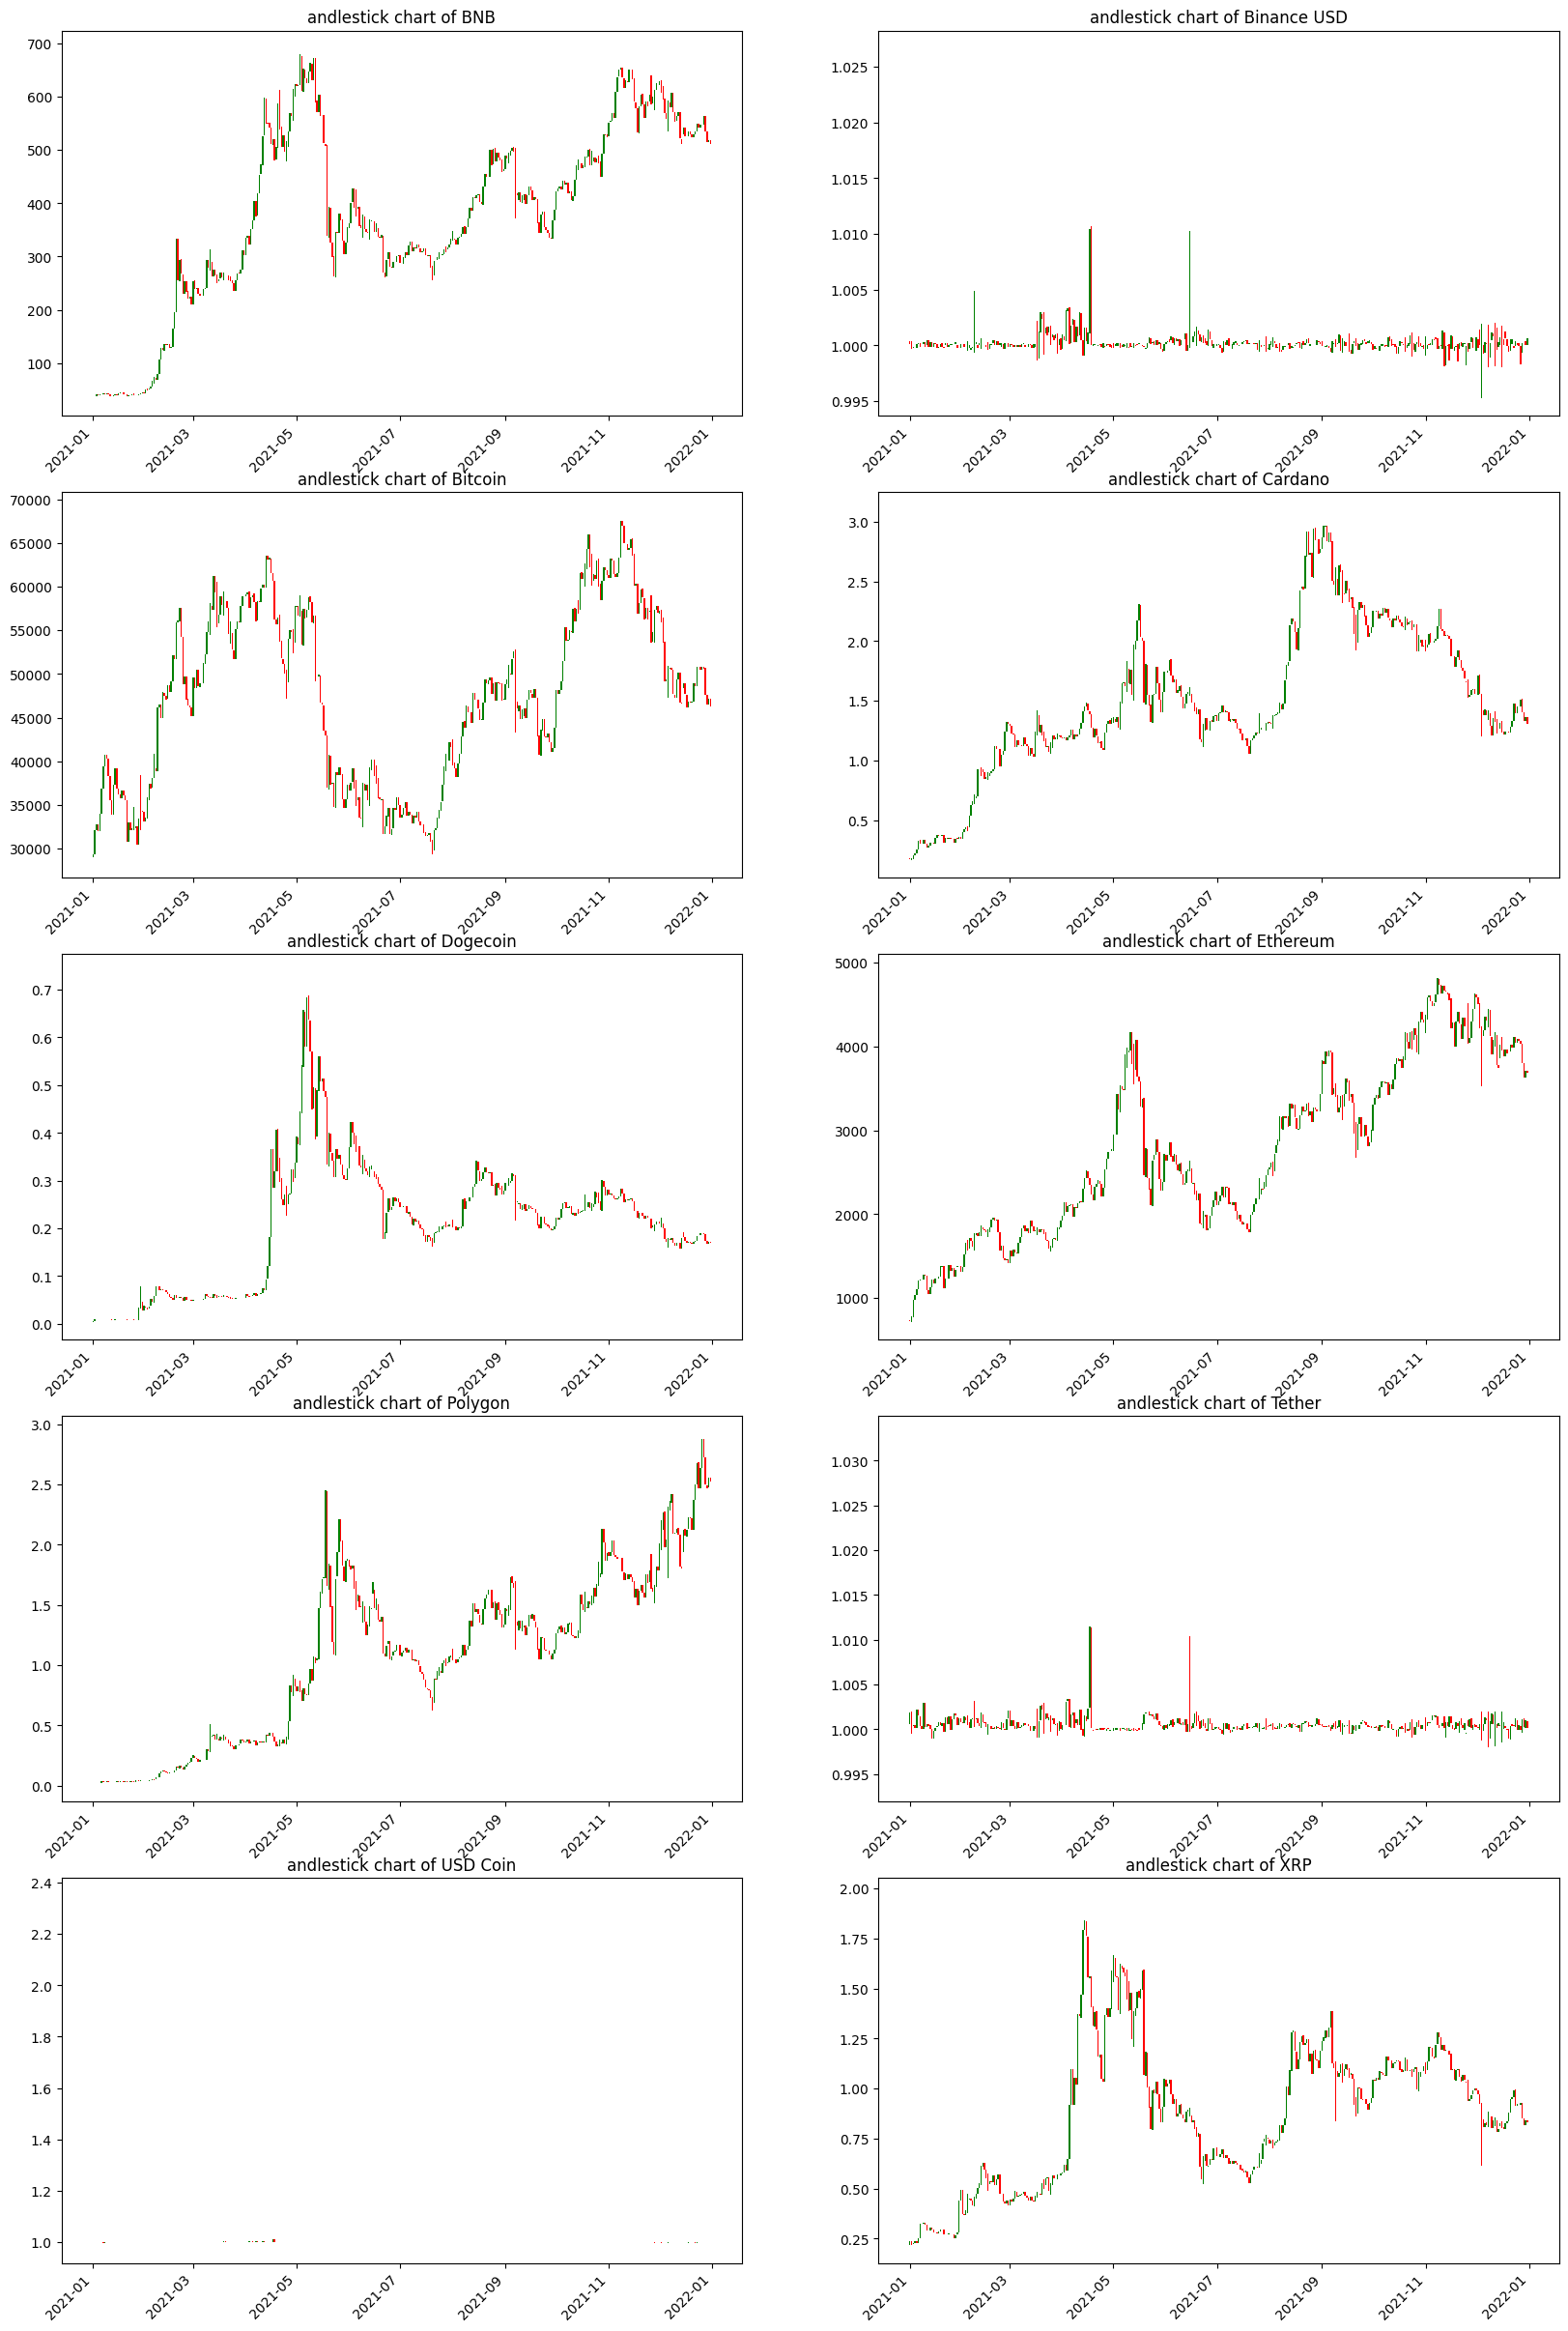

In [67]:
def candlestick_chart():
    plt.rcParams["figure.figsize"] = (20,30)
    width = 0.8
    width2 = 0.05
    col1 = 'green'
    col2 = 'red'
    dem=1
    for i in sorted(Counter(data_['name'])):
        plt.subplot(5,2,dem)
        data_2021=data_[data_['name']==i]
        data_2021['year']=data_['date'].apply(select_year)
        data_2021=data_2021[data_2021['year']=='2021']
        up = data_2021[data_2021['close']>=data_2021['open']]
        down = data_2021[data_2021['close']<data_2021['open']]
    #plot up prices
        plt.bar(pandas.to_datetime(up['date'], format="%Y-%m-%d"),up.close-up.open,width,bottom=up.open,color=col1)
        plt.bar(pandas.to_datetime(up['date'], format="%Y-%m-%d"),up.high-up.close,width2,bottom=up.close,color=col1)
        plt.bar(pandas.to_datetime(up['date'], format="%Y-%m-%d"),up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
        plt.bar(pandas.to_datetime(down['date'], format="%Y-%m-%d"),down.close-down.open,width,bottom=down.open,color=col2)
        plt.bar(pandas.to_datetime(down['date'], format="%Y-%m-%d"),down.high-down.open,width2,bottom=down.open,color=col2)
        plt.bar(pandas.to_datetime(down['date'], format="%Y-%m-%d"),down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
        plt.xticks(rotation=45, ha='right')
        plt.title("andlestick chart of "+ i)
        dem+=1
#display candlestick chart
    plt.show()
candlestick_chart()




## 2.3 Tương quan khối lượng giao dịch giữa các tháng
- Câu hỏi: Vào tháng nào thì loại cryptocurrency nào có khối lượng giao dịch lớn nhất, thấp nhất và sự tương quan giữa các tháng.
- Trả lời:
    - Bitcoin: Lớn nhất vào tháng 2, thấp nhất vào tháng 7, các tháng đầu năm có khối lượng giao dịch lớn, các tháng cuối năm khối lượng thấp hơn.
    - XRP: Lớn nhất vào tháng 4, thấp nhất vào tháng 7, tăng đột biến vào tháng 4 và sau đó giảm mạnh.
    - Dogecoin: Lớn nhất vào tháng 5, thấp nhất vào tháng 3, tăng đột biến vào tháng 4 và tháng 5 sau đó giảm mạnh.
    - Tether: Lớn nhất vào tháng 5, thấp nhất vào tháng 7, 5 tháng đầu năm tăng cao , các tháng cuối năm giảm mạnh.
    - Ethereum: Lớn nhất vào tháng 5 , thấp nhất vào tháng 7, Các tháng đầu năm có khối lượng giao dịch lớn nhơn các tháng cuối năm.
    - BNB: Lớn nhất vào tháng 4, thấp nhất vào tháng 1, tăng cao vào các tháng 2,3,4 và sau đó giảm dần.
    - Cardano: Lớn nhất vào tháng 2, thấp nhất vào tháng 7, khối lượng giao dịch tăng cao ở tháng 2 và tháng 5, các tháng còn lại giảm dần.
    - USD Coin: Lớn nhất vào tháng 11, thấp nhất vào tháng 3 , thị trường giao dịch tăng dần từ đầu năm đến cuối năm.
    - Polygon: Lớn nhất vào tháng 5, thấp nhất vào tháng 1, tăng đột biến vào tháng 5 và sau đó giảm mạnh.
    - Binance USD: Lớn nhất vào tháng 5, thấp nhất vào tháng 1, Khối lượng giao dịch giữa các tháng còn lại dao động ko nhiều.
- Trả lời câu hỏi này giúp các nhà đầu tư biết được sự dao động của khối lượng giao dịch giữa các tháng.


In [68]:
#Trung bình khối lượng theo từng tháng
def TB_Volume_Thang_ID(data_,ID):
    temp_df=data_[data_['id']==ID]
    data_by_month = temp_df[['volume','date']]
    data_by_month['month']=data_by_month['date'].apply(select_month)
    data_by_month['month']=data_by_month['month'].astype(int)
    data_by_month['year']=data_by_month['date'].apply(select_year)
    data_by_month['year']=data_by_month['year'].astype(int)
    data_by_month=data_by_month[data_by_month['year']==2021]
    dict_month={}
    for i in range(1,13):
        tmp=list(data_by_month[data_by_month['month']==i]['volume'])
        dict_month[i]=sum(tmp)
    return dict_month
#Trung bình khối lượng giao dịch theo từng năm 
def TB_Volume_Nam_ID(data_,ID):
    temp_df=data_[data_['id']==ID]
    data_by_year = temp_df[['volume','date']]
    data_by_year['year']=data_by_year['date'].apply(select_year)
    data_by_year['year']=data_by_year['year'].astype(int)
    dict_year={}
    for i in sorted(Counter(data_by_year['year'])):
        tmp=list(data_by_year[data_by_year['year']==i]['volume'])
        dict_year[i]=sum(tmp)/len(tmp)
    return dict_year



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\2807519759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['date'].apply(select_month)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\2807519759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['month'].astype(int)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\2807519759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

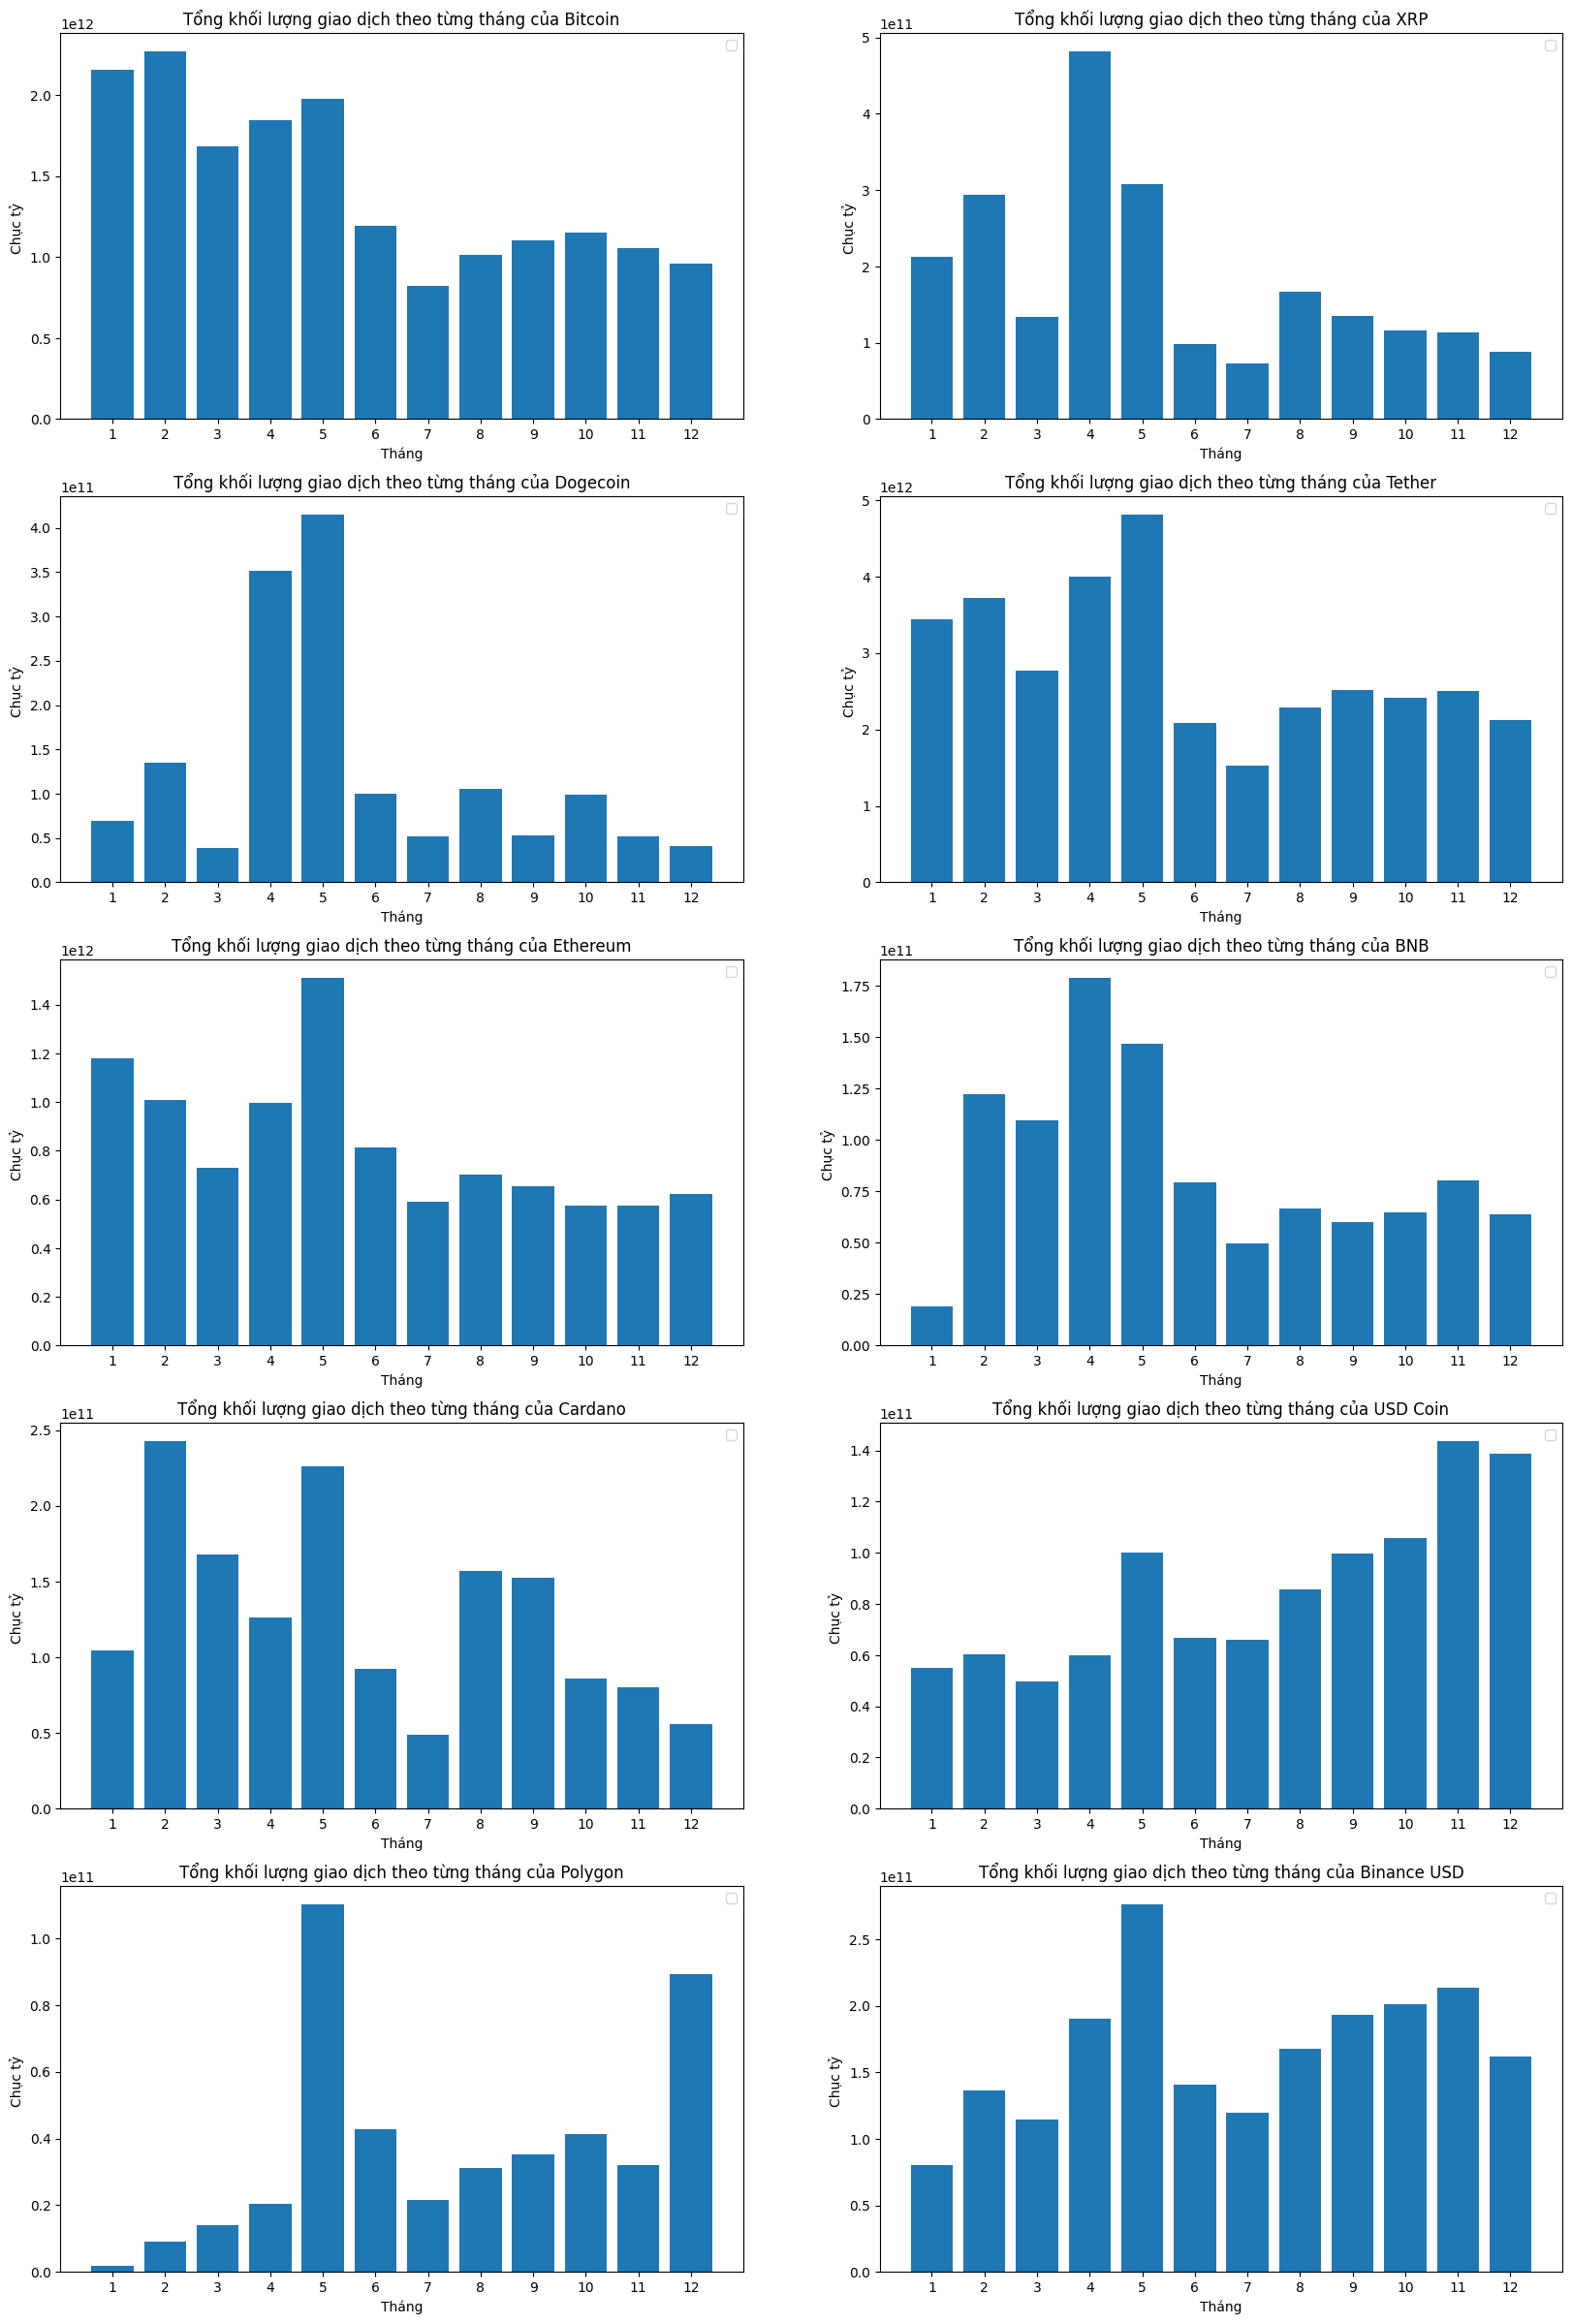

In [69]:
def draw_10_barchart(data_):
    plt.rcParams["figure.figsize"] = (20,30)
    dem=1
    for i in sorted(Counter(data_['id'])):
        #data_cryto=data_[data_['id']==i]
        dict_month=TB_Volume_Thang_ID(data_,i)
        list_name=data_[data_['id']==i]['name'].unique()
        plt.subplot(5,2,dem)
        plt.bar([str(i) for i in dict_month.keys()],list(dict_month.values()))
        plt.ylabel('Chục tỷ ')
        plt.xlabel('Tháng')
        #plt.title('Tổng khối Lượng giao dịch theo từng tháng')
        plt.title("Tổng khối lượng giao dịch theo từng tháng của "+list_name[0])
        dem+=1
        plt.legend()
    plt.show()
draw_10_barchart(data_)


## 2.4 Biến động giá theo tháng trong năm 2021
- Câu hỏi: Biến động giá trong năm như thế nào? Chênh lệch giá cao nhất và thấp nhất trong các tháng? Nên đầu tư và bán cryptocurrency vào tháng nào trong năm?
- Trả lời: 
 - Bitcoin: Giá tăng vào các tháng đầu năm, sau đó giảm dần vào các tháng giữa năm và tăng trở lại vào các tháng cuối năm. Sự chênh lệch giá cao nhất và thấp nhất trong 1 tháng rất lớn. Nên bán vào tháng 4 và tháng 11.
 - XRP: Tăng vào 5 tháng đầu năm và đột biến vào tháng 4 dẫn đến chênh lệch giá cao nhất và thấp nhất trong tháng 4 là rất lớn. Nên bán vào tháng 4.
 - DogeCoin: Tăng đột biến vào tháng 5 và sau đó giảm dần. Chênh lệch giá vào tháng 5 rất lớn. Nên mua vào tháng 1 và bán vào tháng 5.
 - Tether: Tăng 1 ít vào tháng 4 và 11 còn lại không biến động. Chênh lệch rất nhỏ.
 - Ethereum: Tăng dần từ đầu năm đến cuối năm, chênh lệch giá lớn nhất vào tháng 5. Nên mua đầu năm và bán cuối năm.
 - BNB: Tăng dần 5 tháng đầu năm, giảm dần ở tháng 6,7 và sau đó tăng trở lại đến hết năm. Chênh lệch giá vào tháng 4 và 5 là lớn nhất. Nên mua đầu năm và bán vào tháng 5 và cuối năm.
 - Cardano: Tăng dần vào 5 tháng đầu năm , giảm dầu ở tháng 6,7 và sau đó tăng trở lại đến tháng 9 và tiếp tục giảm ở 3 tháng cuối năm. Chênh lệch cao nhất vào tháng 9. Nên bán vào tháng 9 và mua vào đầu năm.
 - USD Coin: Hầu như không biến động, tăng đột biến vào 1 ngày trong tháng 11 sau đó trở về lại mức 1 USD.
 - Polygon: Tăng từ đầu năm đến cuối năm và giảm nhẹ vào tháng 7. Chênh lệch giá lớn nhất vào tháng 5. Nên mua vào đầu năm và bán vào cuối năm.
 - Binance USD: Hầu như không thay đổi.
- Trả lời được câu hỏi trên giúp các nhà đầu tư ra quyết định thích hợp vào các thời điểm.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\2789463398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['date'].apply(select_month)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\2789463398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['year']=data_by_month['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\2789463398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

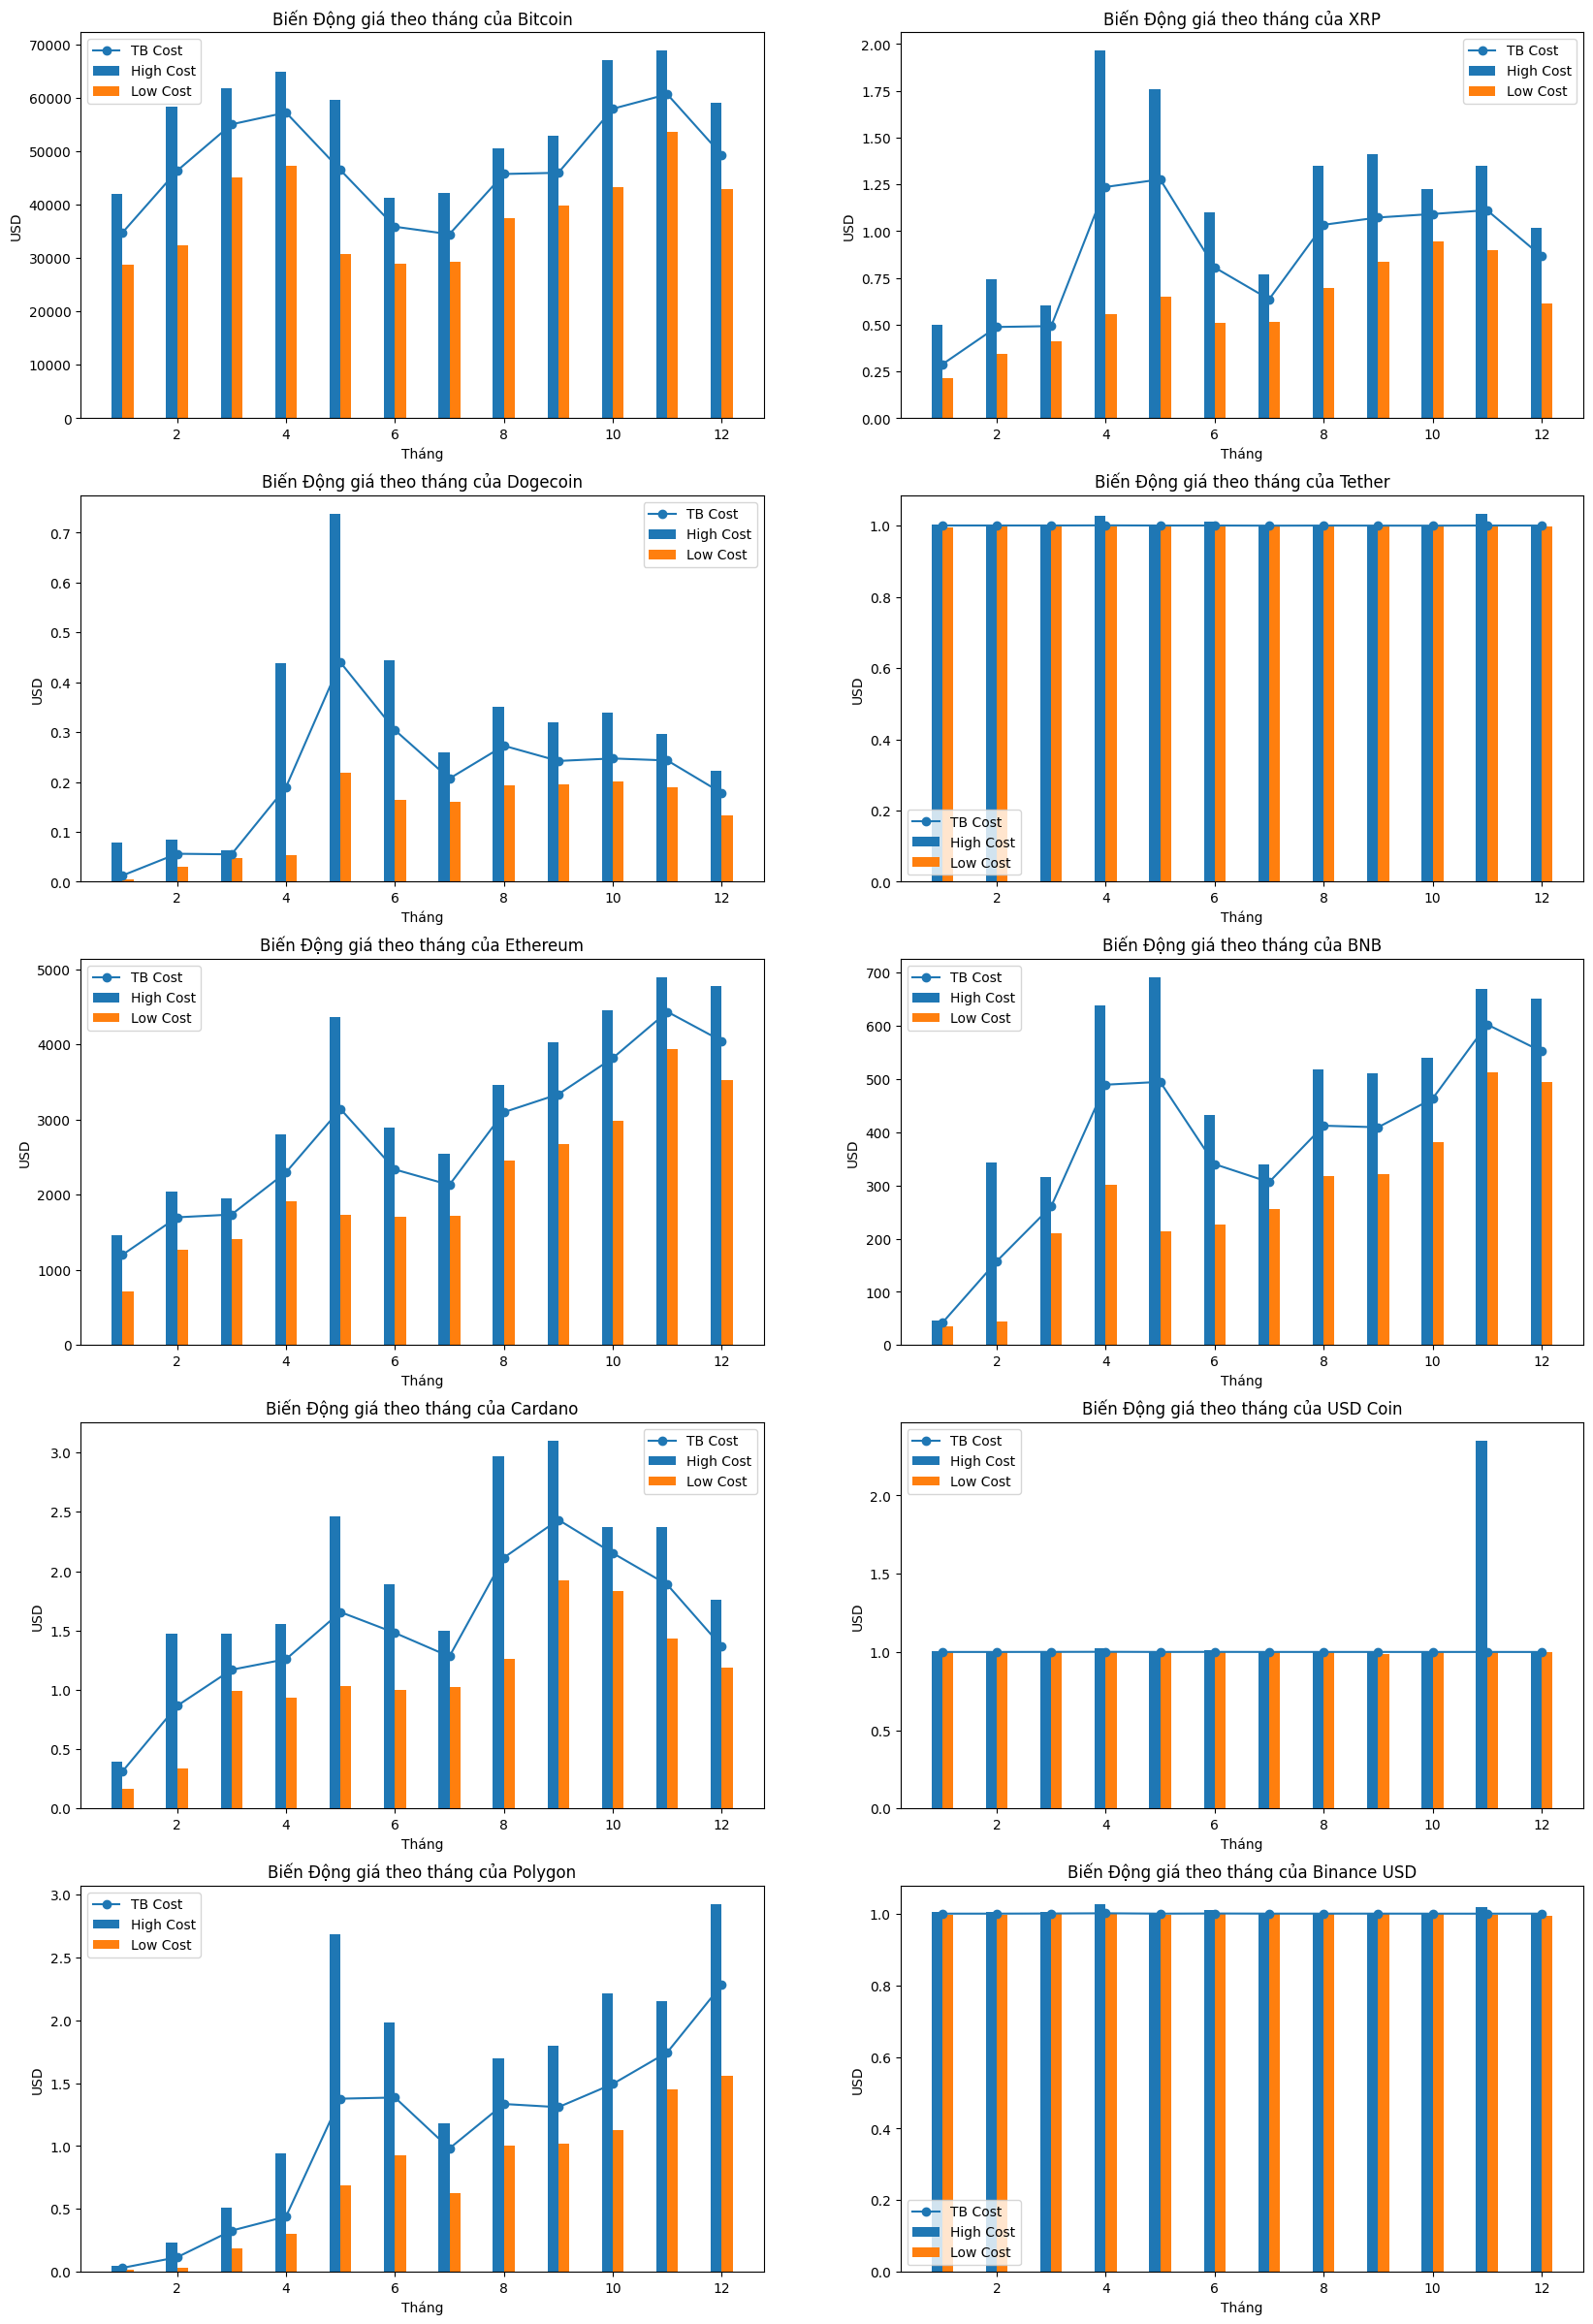

In [70]:
def TB_Cost_Thang_ID(data_,ID):
    temp_df=data_[data_['id']==ID]
    data_by_month = temp_df[['high','low','close','date']]
    data_by_month['month']=data_by_month['date'].apply(select_month)
    data_by_month['year']=data_by_month['date'].apply(select_year)
    data_by_month['month']=data_by_month['month'].astype(int)
    data_by_month['year']=data_by_month['year'].astype(int)
    data_by_month=data_by_month[data_by_month['year']==2021]
    dict_month={}
    for i in range(1,13):
        tmp_high=list(data_by_month[data_by_month['month']==i]['high'])
        tmp_low=list(data_by_month[data_by_month['month']==i]['low'])
        tmp_close=list(data_by_month[data_by_month['month']==i]['close'])
        #dict_month[i]=[max(tmp_high),min(tmp_low),(sum(tmp_low)+sum(tmp_high))/((len(tmp_low)*2))]
        dict_month[i]=[max(tmp_high),min(tmp_low),sum(tmp_close)/(len(tmp_close))]
    return dict_month
def draw_10_change_cost(data_):
    plt.rcParams["figure.figsize"] = (20,30)
    dem=1
    for i in sorted(Counter(data_['id'])):
        dict_cost_bitcoin_month=TB_Cost_Thang_ID(data_,i)
        list_name=data_[data_['id']==i]['name'].unique()
        plt.subplot(5,2,dem)
        [str(i) for i in dict_cost_bitcoin_month.keys()]
        #plt.rcParams["figure.figsize"] = (20,10)
        np.array(list(dict_cost_bitcoin_month.values())).transpose()[0]
        #plt.subplot(2,1,1)
        plt.bar(np.array(list(dict_cost_bitcoin_month.keys()))-float(0.1),np.array(list(dict_cost_bitcoin_month.values())).transpose()[0],width=0.2,label='High Cost')
        plt.bar(np.array(list(dict_cost_bitcoin_month.keys()))+float(0.1),np.array(list(dict_cost_bitcoin_month.values())).transpose()[1],width=0.2,label='Low Cost')
        plt.plot(np.array(list(dict_cost_bitcoin_month.keys())),np.array(list(dict_cost_bitcoin_month.values())).transpose()[2],label='TB Cost',marker='o')
        #plt.legend()
        plt.title('Biến Động giá theo tháng của ' + list_name[0])
        plt.ylabel('USD')
        plt.xlabel('Tháng')
        dem+=1
        plt.legend()
    plt.show()
draw_10_change_cost(data_)

## 2.5 Thời gian giá lên cao nhất
- Câu hỏi: Thời gian nào trong ngày có thời gian lên cao nhất ? Các nhà đầu tư nên bán cryptocurrency vào khung giờ nào trong ngày ?
- Trả lời: 
    - BNB, Dogecoin, XRP, Cardano : Khung giờ 0h chiếm nhiều nhất. Các khung giờ khác khá đồng đều nhưng chiếm ít . Nên bán vào khung giờ 0h.
    - Binance USD: Phấn bố khá đồng đều. Cao nhất là khung giờ 14h . Nên bán vào khung giờ 21h - 00h và 14h.
    - Bitcoin, Polygon, Ethereum: Tập trung vào 23h-1h. Do đó nên bán vào khung giờ này.
    - Tether, USD Coin: Phân bố đồng đều trong ngày, Cao nhất là 00h,7h,18h đối với 


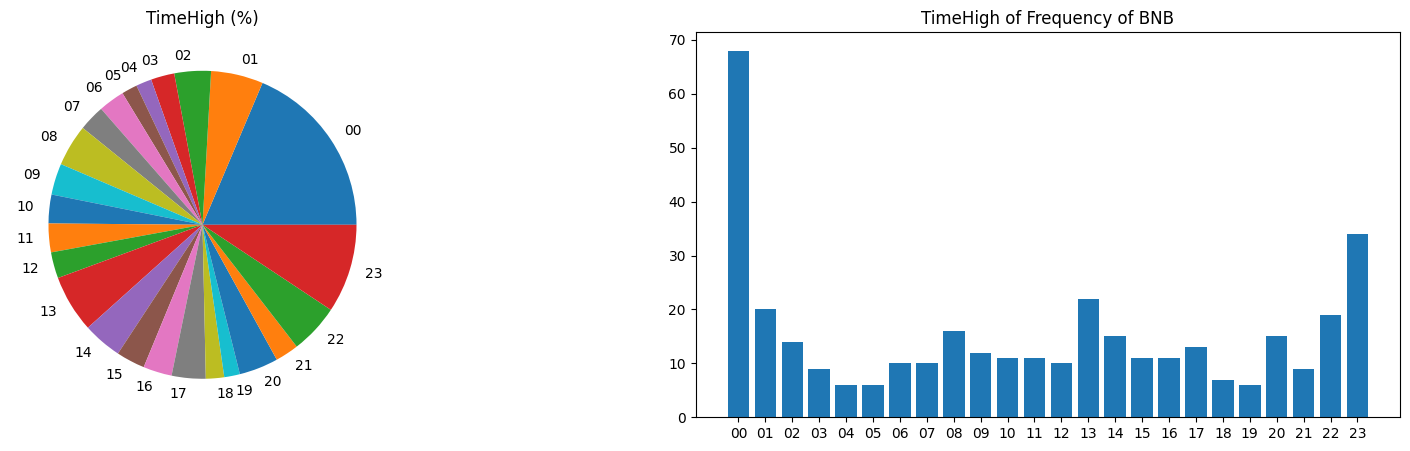

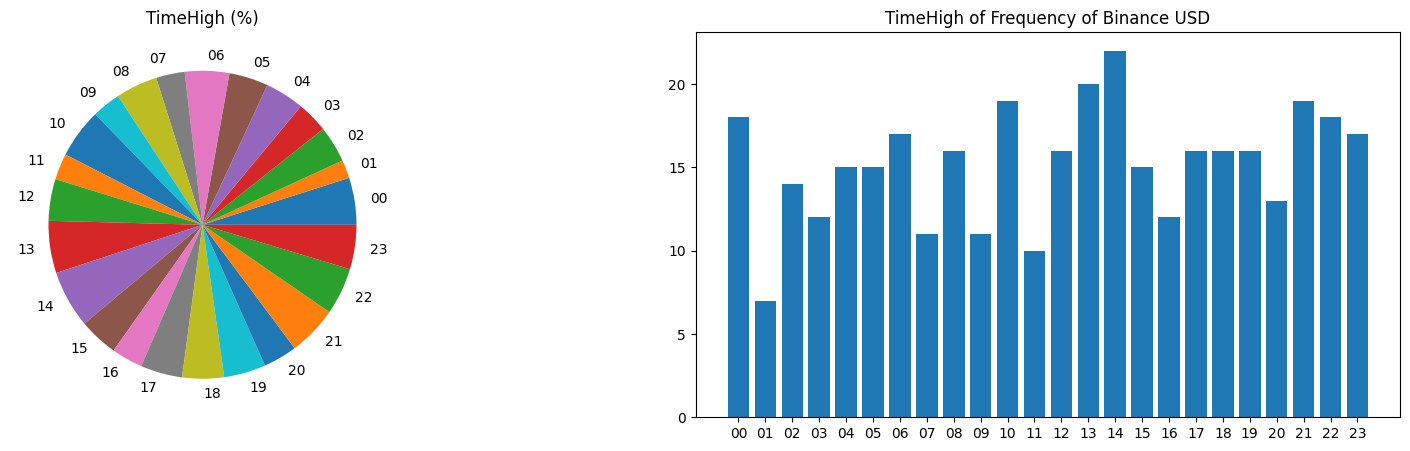

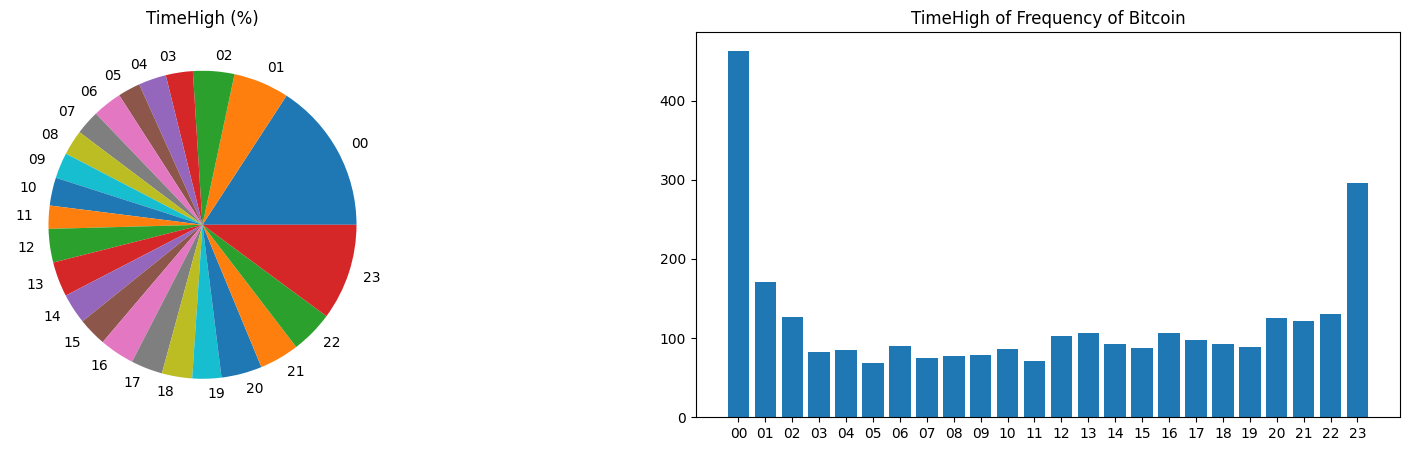

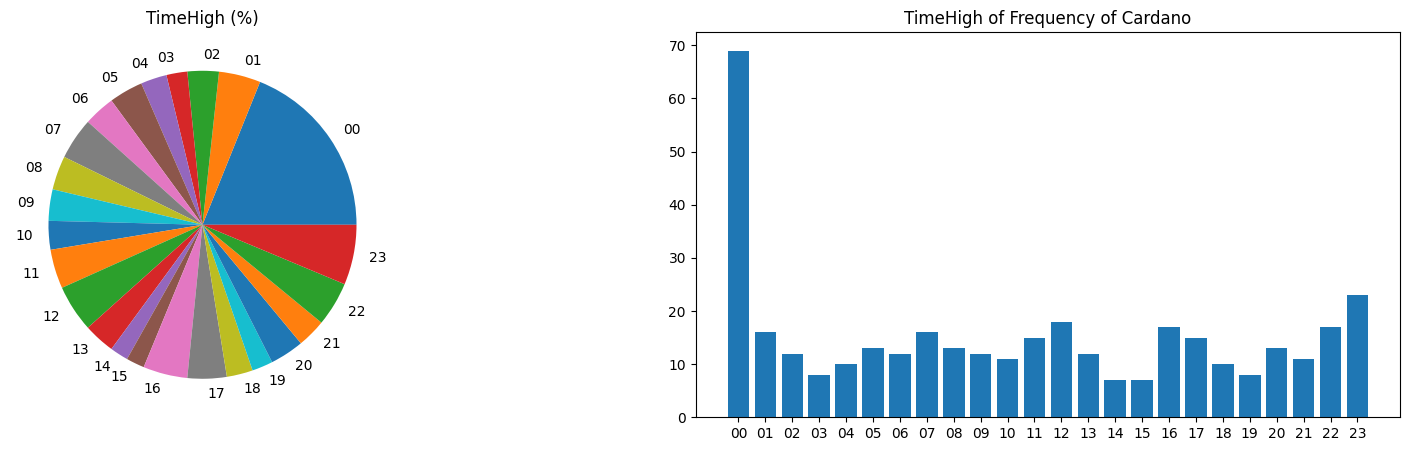

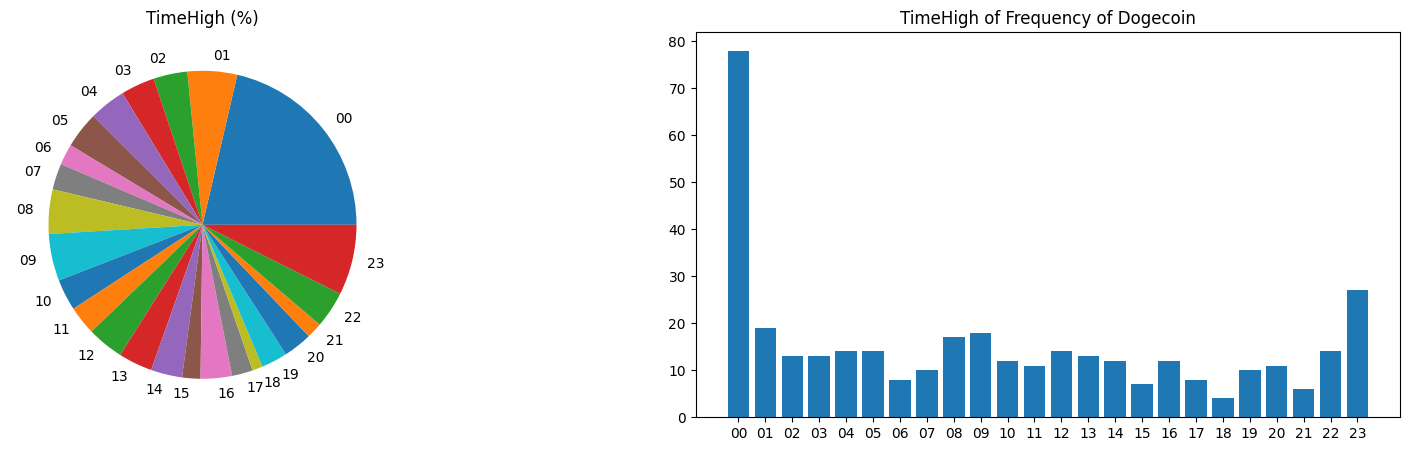

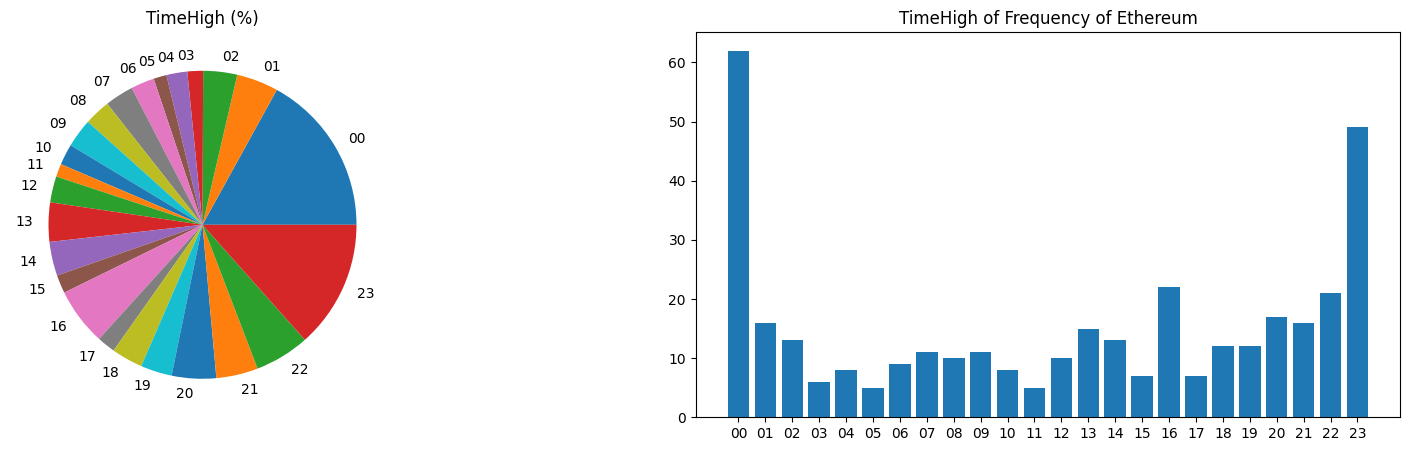

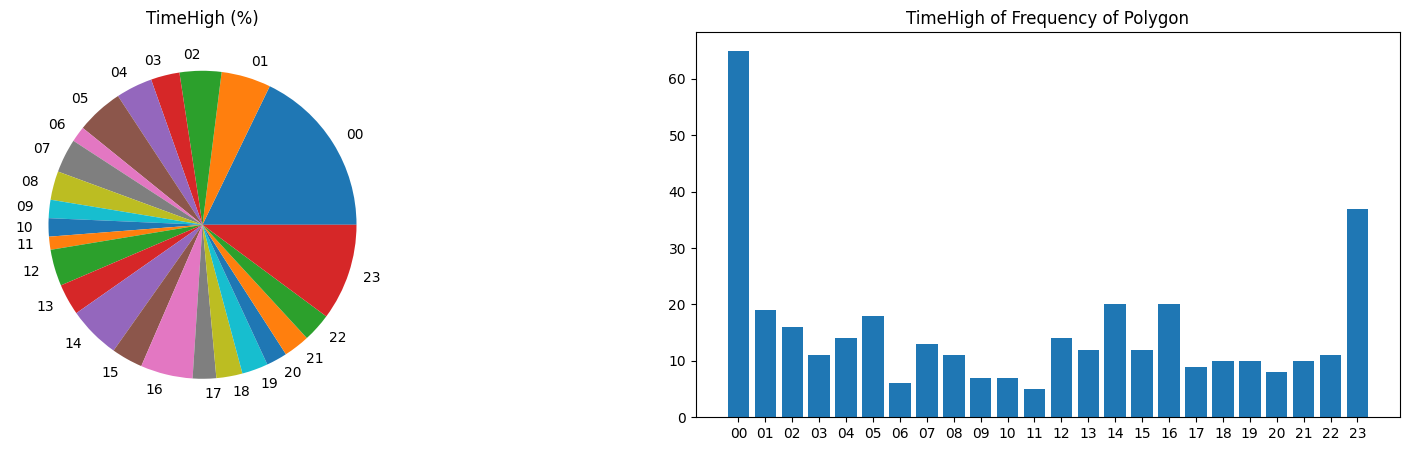

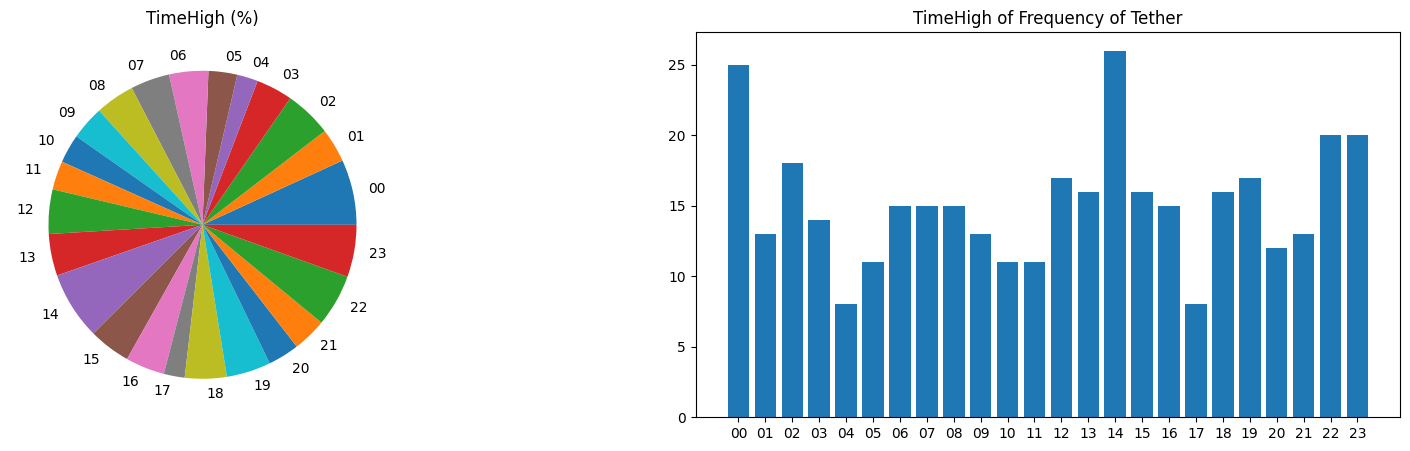

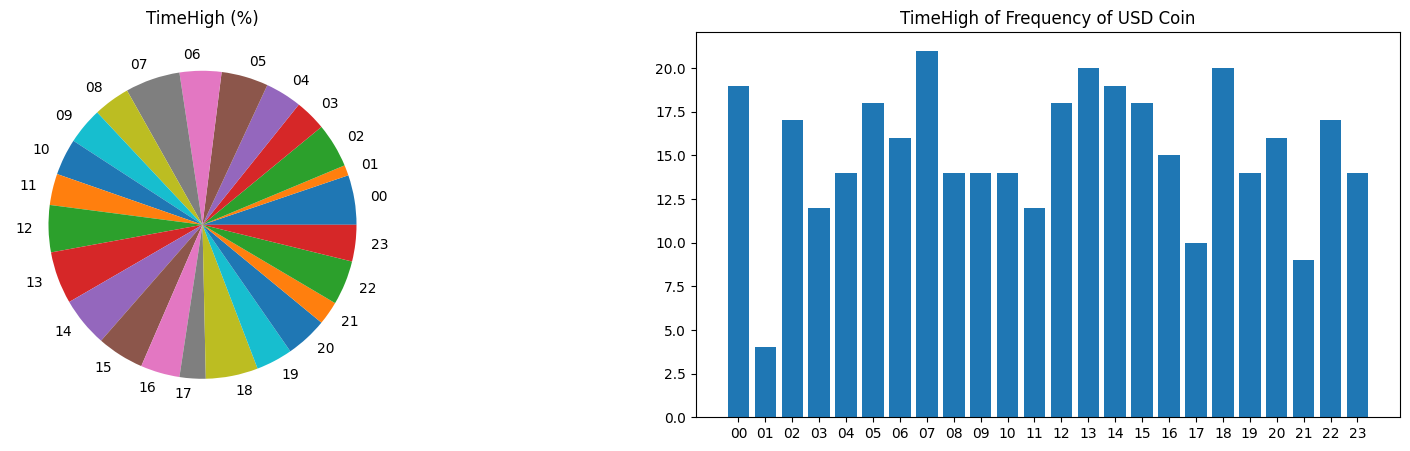

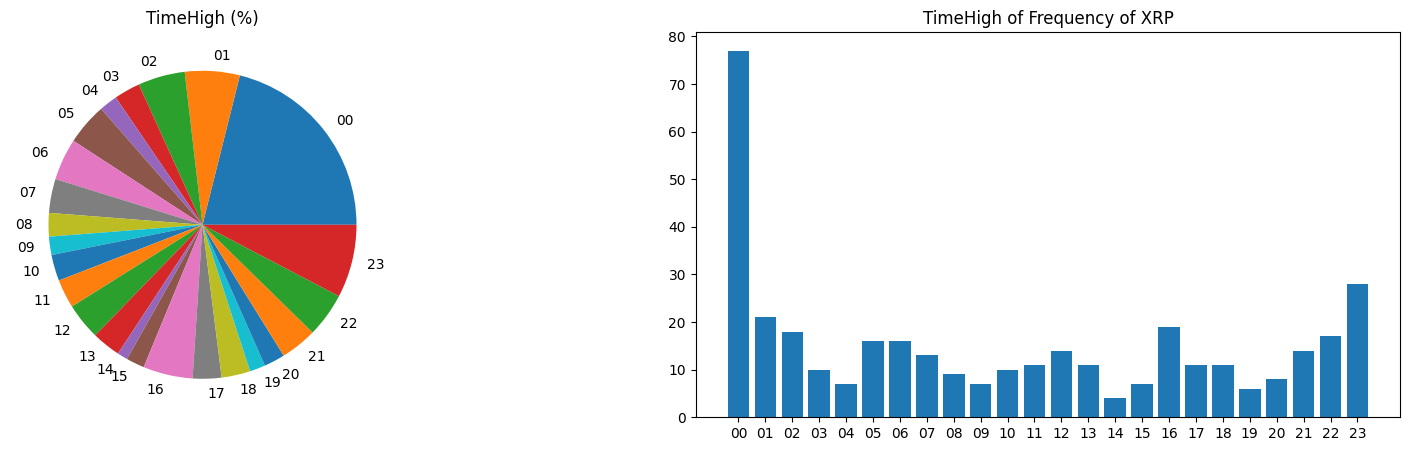

In [71]:
def draw_TimeHigh(data_):
    for i in sorted(Counter(data_['name'])): 
        temp_df=data_[data_['name']==i]
        list_time_high=[]# list time theo thời gian và phút
        for j in list(temp_df['timeHigh']):
            list_time_high.append(j[0:2])
        l=dict(sorted(Counter(list_time_high).items()))
        circle=[]
        sum_values_l=sum(l.values())
        for j in l.values():
            circle.append(j/sum_values_l)
        fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
        plt.subplot(1,2,1)
        plt.pie(circle,labels =list(l.keys()))
        plt.title('TimeHigh (%)')
        plt.subplot(1,2,2)
        plt.bar(list(l.keys()),list(l.values()))
        plt.title("TimeHigh of Frequency of "+str(i))
    plt.show()
draw_TimeHigh(data_)

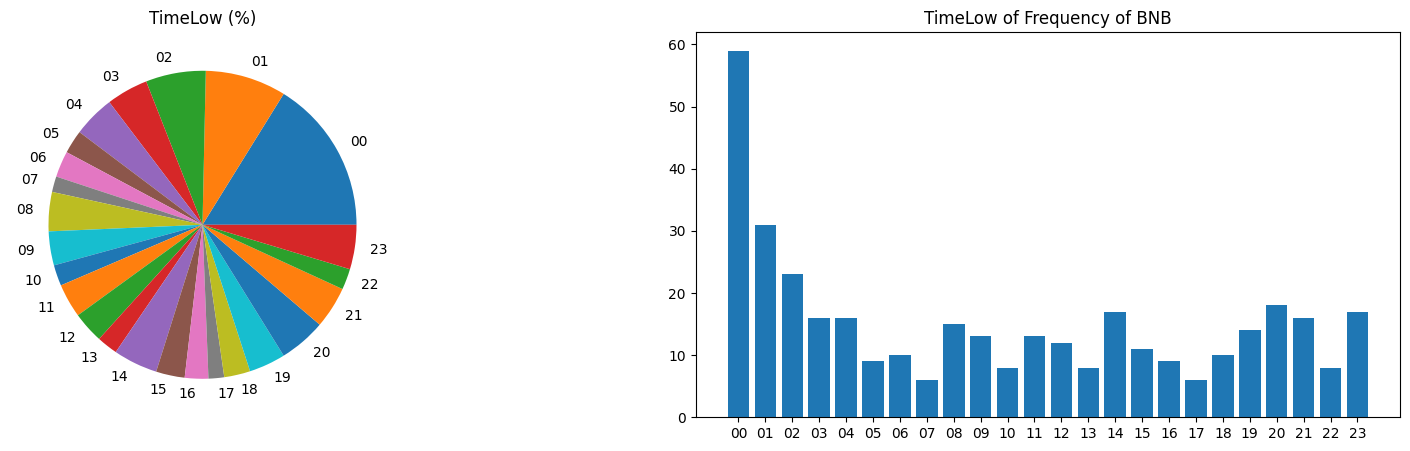

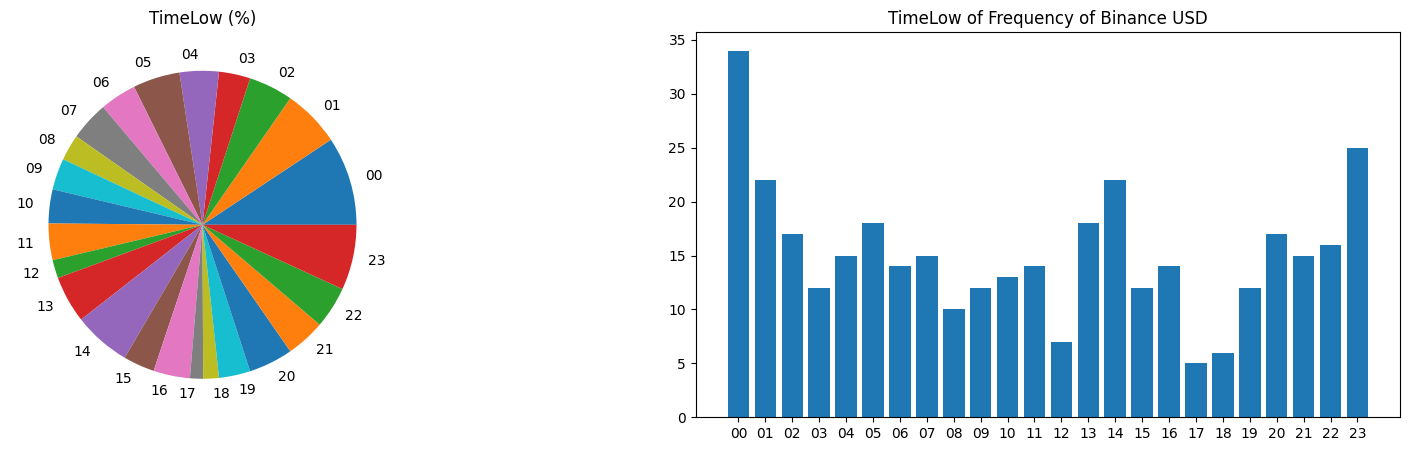

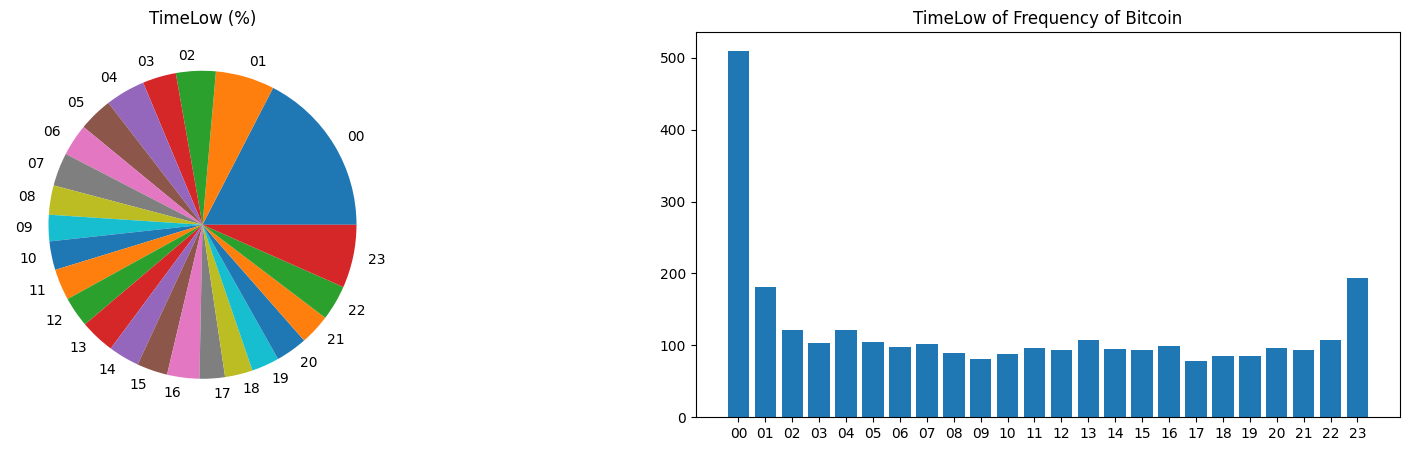

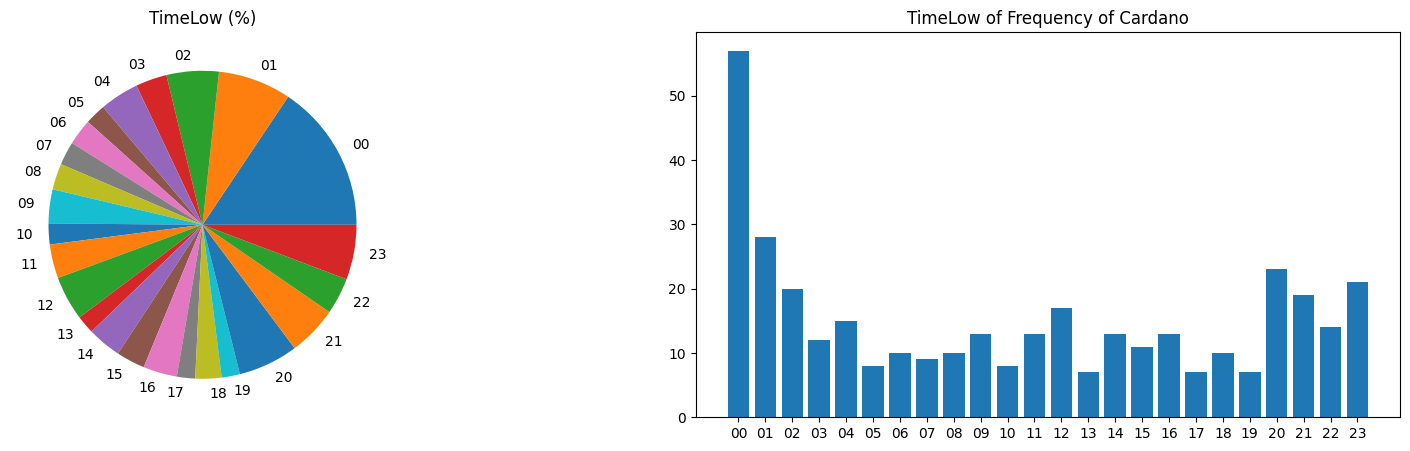

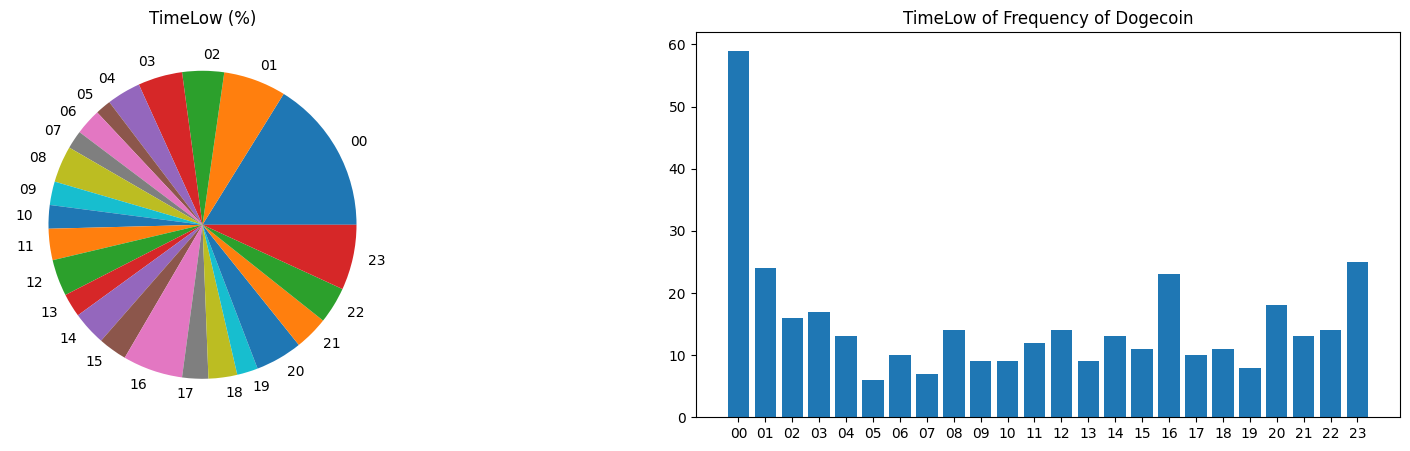

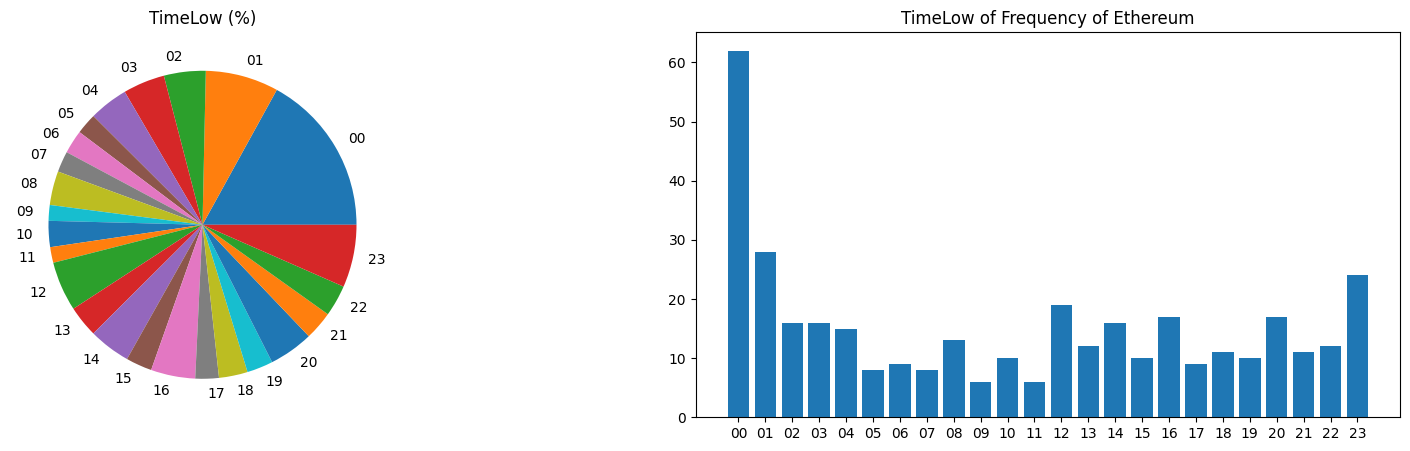

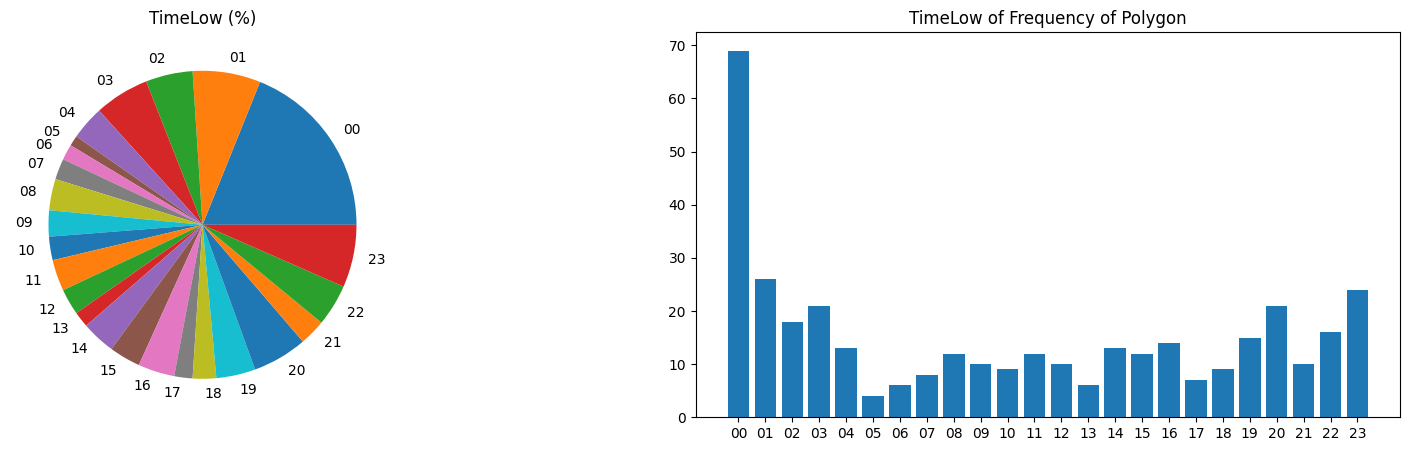

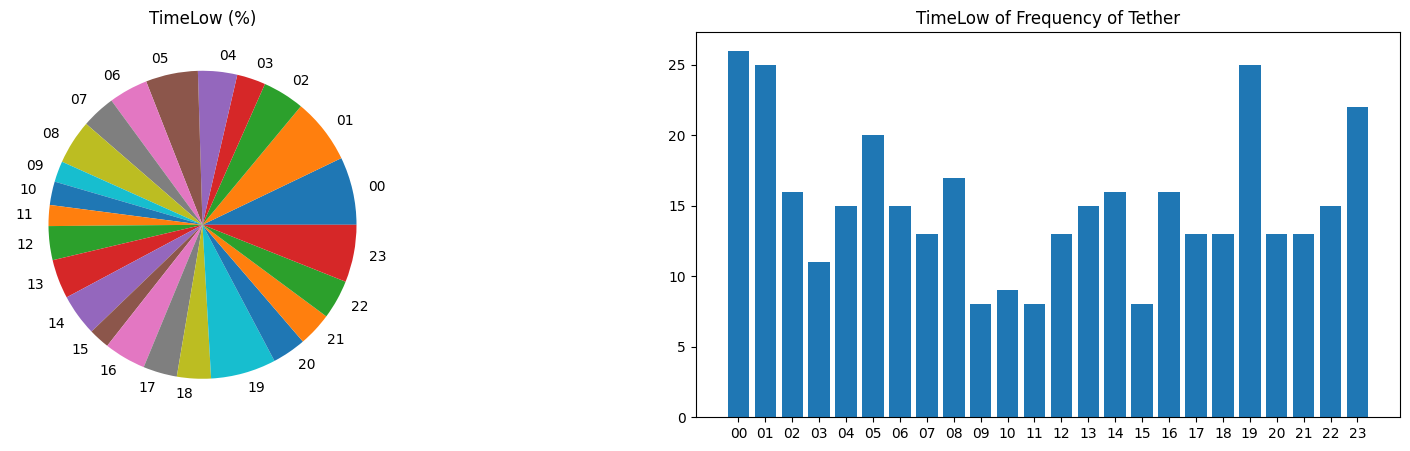

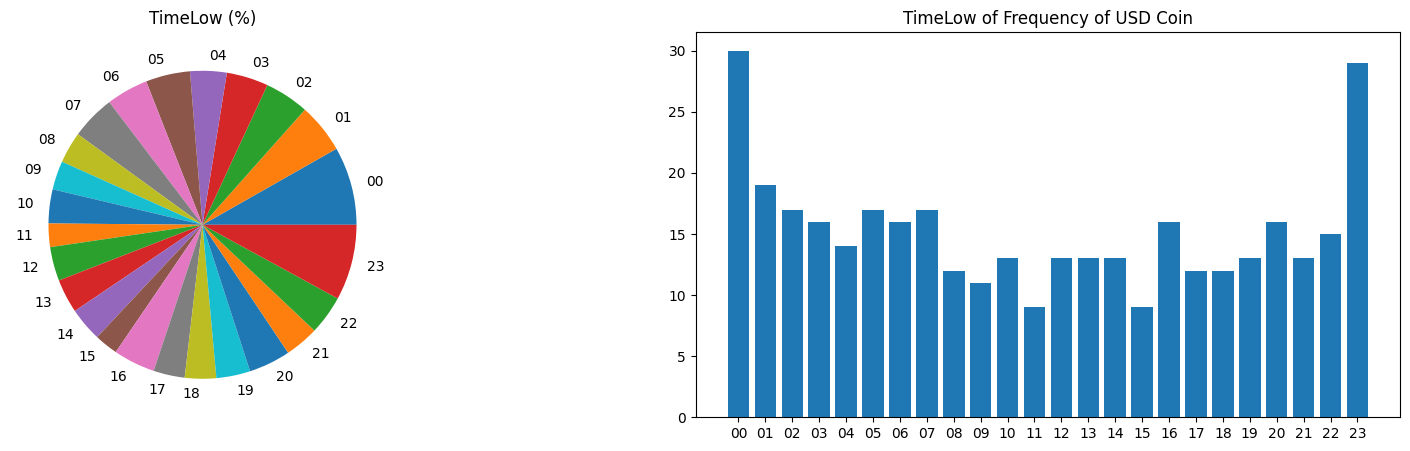

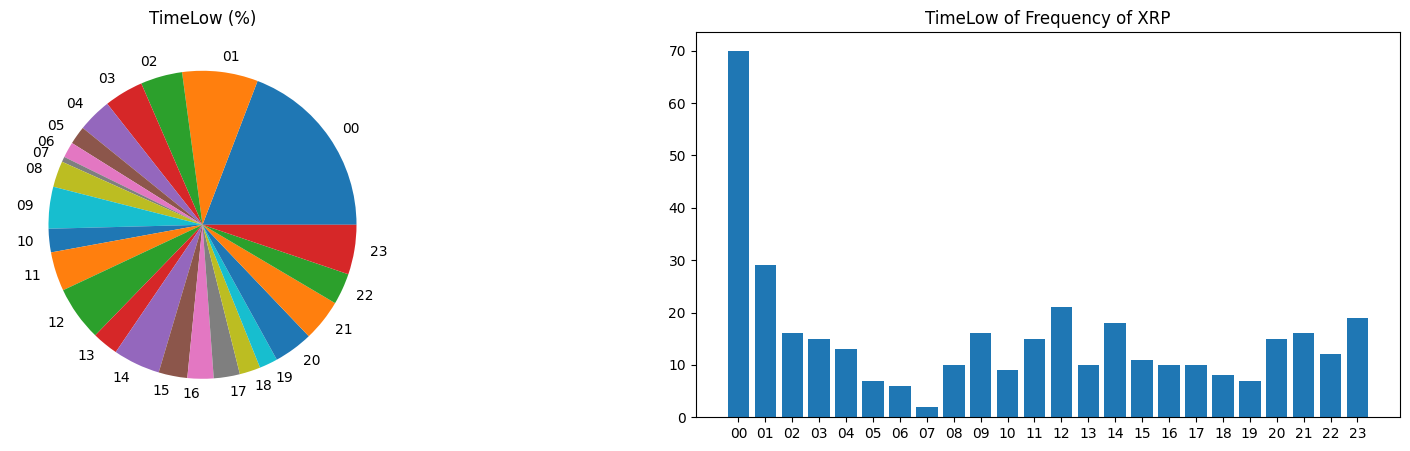

In [72]:
def draw_timeLow(data_):
    for i in sorted(Counter(data_['name'])): 
        temp_df=data_[data_['name']==i]
        list_time_low=[]# list time theo thời gian và phút
        for j in list(temp_df['timeLow']):
            list_time_low.append(j[0:2])
        l=dict(sorted(Counter(list_time_low).items()))
        circle=[]
        sum_values_l=sum(l.values())
        for j in l.values():
            circle.append(j/sum_values_l)
        fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
        plt.subplot(1,2,1)
        plt.pie(circle,labels =list(l.keys()))
        plt.title('TimeLow (%)')
        plt.subplot(1,2,2)
        plt.bar(list(l.keys()),list(l.values()))
        plt.title("TimeLow of Frequency of "+i)
        plt.show()
draw_timeLow(data_)

## 2.6 Price spread of Crypto of 2021 :
- Tại đây, ta tiến hành vẽ biểu đồ boxplot để nhận xét giá của crypto qua từng tháng

***Câu hỏi*** : Vào tháng nào thì những loại crypto nào nên mua? và nên mua trong khoảng giá nào để không lỗ?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\157208545.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_year['year']=data_by_year['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\157208545.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_year['year']=data_by_year['year'].astype(int)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9340\157208545.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

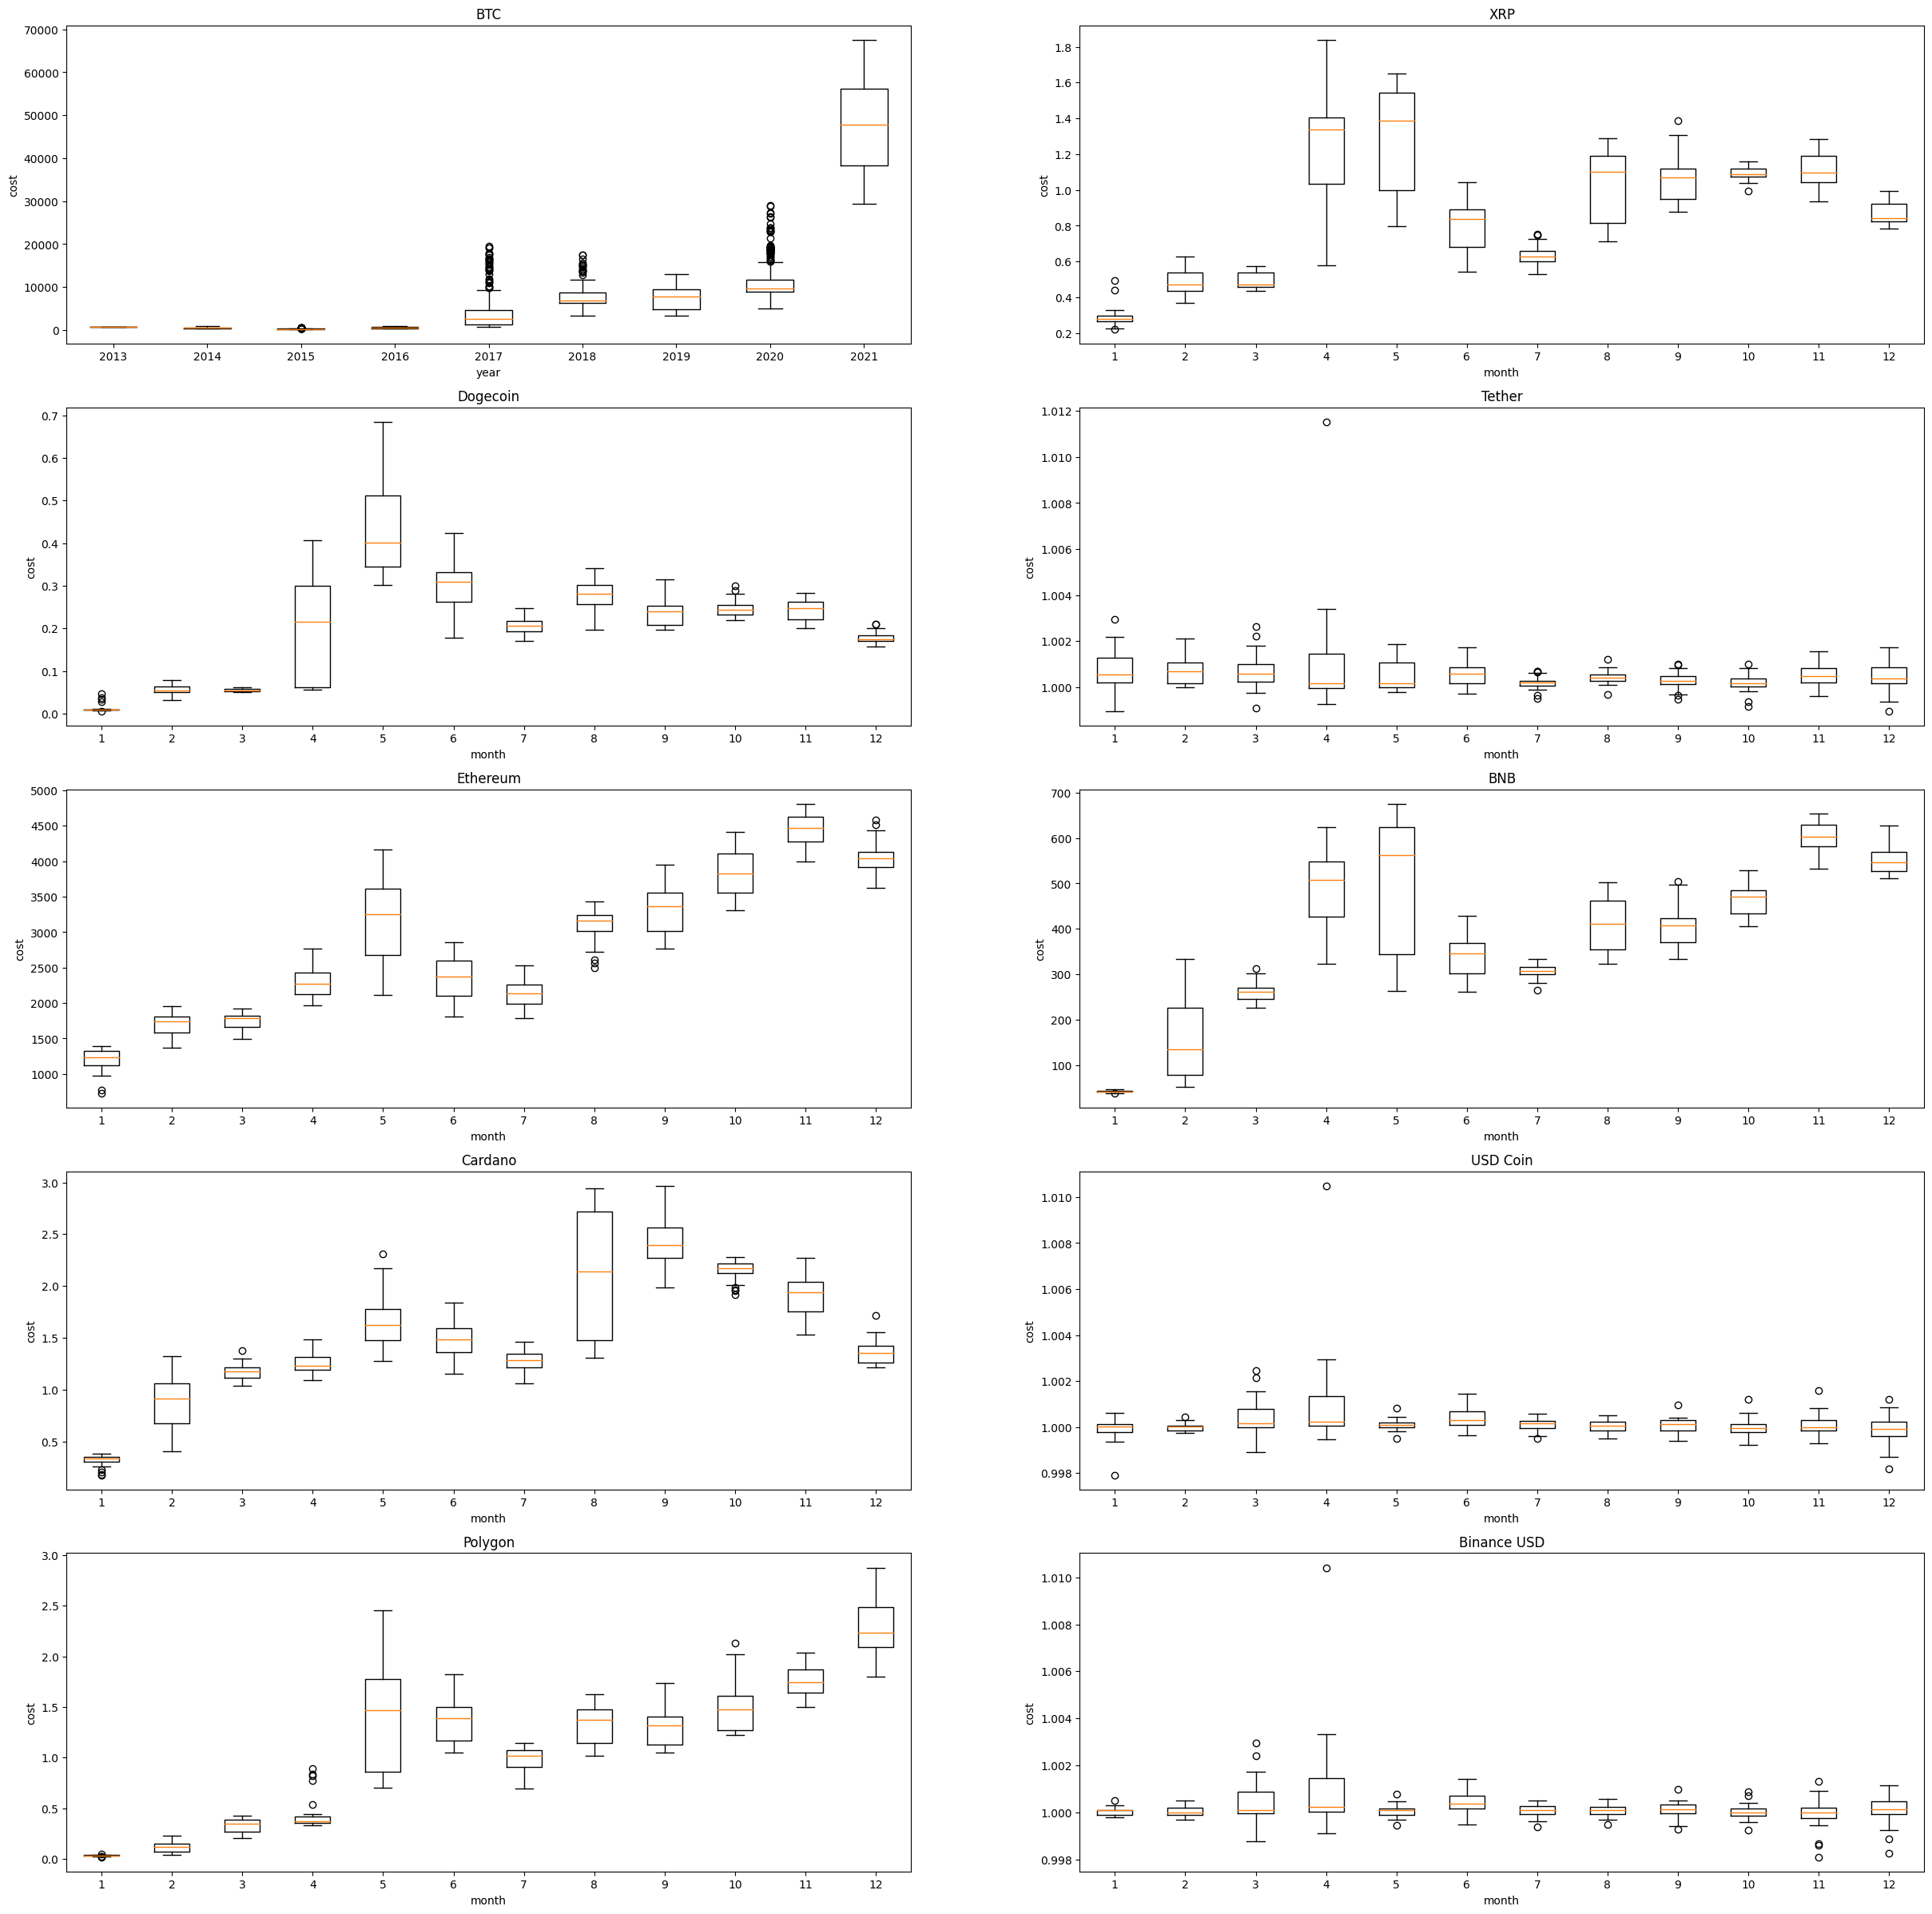

In [73]:
def central_cost ():
    plt.rcParams["figure.figsize"] = (30,30)
    list_id=sorted(Counter(data_['id']))
    list_name={}
    for i in list_id:
        list_name[i]=list(data_[data_['id']==i]['name'])[0]
    data=[]
    # Giá Coint BTC theo năm
    temp_df=data_[data_['id']==1]
    plt.subplot(5,2,1)
    data_by_year = temp_df[['close','date']]
    data_by_year['year']=data_by_year['date'].apply(select_year)
    data_by_year['year']=data_by_year['year'].astype(int)
    for j in sorted(Counter(data_by_year['year'])):
            data.append(data_by_year[data_by_year['year']==j]['close'])
    plt.boxplot(data,labels=sorted(Counter(data_by_year['year'])))
    plt.ylabel('cost')
    plt.xlabel('year')
    plt.title('BTC')
    
    # Coin Khác BTC 
    dem=2
    for i in list_id[1:]:
        plt.subplot(5,2,dem)
        temp_df=data_[data_['id']==i]
        data_by_month = temp_df[['close','date']]
        data_by_month['month']=data_by_month['date'].apply(select_month)
        data_by_month['month']=data_by_month['month'].astype(int)
        data=[]
        for j in sorted(Counter(data_by_month['month'])):
            data.append(data_by_month[data_by_month['month']==j]['close'])
        plt.boxplot(data)
        plt.ylabel('cost')
        plt.xlabel('month')
        plt.title(list_name[i])
        dem+=1
    plt.show()
central_cost()

***Trả lời*** 
- BTC: dữ liệu thu thập theo năm. Có sự tăng mạnh từ năm 2021.Do vậy mức giá tập trung dao động trong khoảng 40k-70k USD (khá cao)
- XPR: Mức giá khá thấp, tập trung vào khoảng 0.2-1.8 USD . Nên mua vào tháng đầu của năm khi thị trường có giao động quá nhiều. 
... 

***Lợi ích***
- Trợ giúp nhà đầu tư cho biết khoảng giá nên đầu tư
- Tháng nào nên đầu tư những loại coin nào thì sẽ đạt lợi nhuận tốt.